# Importing Libraries

In [ ]:
# Import helpful libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Loading dataset

In [ ]:
# Loading the Train Data Set
data = pd.read_csv('/content/training_set.csv')
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [ ]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0    X1    X2    X3     X4    X5    X6    X7    X8    X9  ...  \
0              0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.00  ...   
1              1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.00  ...   
2              2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3              3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.00  ...   
4              4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.00  ...   
...          ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   
3905        3905  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3906        3906  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3907        3907  0.12  0.00  0.12   0.00  0.00  0.25  0.00  0.00  0.00  ...   
3908        3908  0.00  0.00  0.00   0.00  0.00  0.00  0.00  3.12  0.00  ...   
3909        3909  0.96  0.00  0.48   0.00  0.00  0.96  0.00  0.00  0.48  ...   

     

In [ ]:
data['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
3905    3905
3906    3906
3907    3907
3908    3908
3909    3909
Name: Unnamed: 0, Length: 3910, dtype: int64

### Inference
* The column 'Unnamed: 0' is acting like the index.
* So we can remove this column from our dataset
* Y column is our output column

In [ ]:
unchanged_data = data.copy()
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


# Exploration

In [ ]:
data.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
X24    float64
X25    float64
X26    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    float64
X32    float64
X33    float64
X34    float64
X35    float64
X36    float64
X37    float64
X38    float64
X39    float64
X40    float64
X41    float64
X42    float64
X43    float64
X44    float64
X45    float64
X46    float64
X47    float64
X48    float64
X49    float64
X50    float64
X51    float64
X52    float64
X53    float64
X54    float64
X55    float64
X56      int64
X57      int64
Y        int64
dtype: object

> So all of our data is numerical

### Checking Null values

In [ ]:
features_with_null_values = []
n_rows = len(data.index)
for feature in data.columns:
    sum_nan = data[feature].isna().sum()
    if sum_nan > 0:
        percentage_nan = sum_nan*100/n_rows
        print("{:15s} {:5d} {:10.3f}%".format(feature, sum_nan, percentage_nan))
        features_with_null_values.append(feature)
    else:
        pass

In [ ]:
print(features_with_null_values)

[]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

> No null values

In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


## Inference
* No null values in dataset
* Scale of values in columns X55, X56, X57. etc. is different than other features in our table

In [ ]:
y = data['Y']
y.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

> Traning dataset has more values as 0 than 1

#### Checking skewness of our model
A convenient way of evaluating skewness is with pandas’ “.skew” method. It calculates the ***Fisher–Pearson standardized moment coefficient*** for all columns in a dataframe.
* It is applied on numerical variables
* Here all our variables are numerical

In [ ]:
# Skew values of the features 
skewness = pd.DataFrame((data.drop(['Y'],axis =1)).skew(axis = 0).sort_values(ascending = False)).T
skewness

,X56,X54,X38,X4,X55,X48,X47,X44,X52,X51,...,X11,X18,X37,X6,X5,X9,X3,X12,X21,X19
0,31.10373,30.813019,28.9348,27.536596,25.550425,19.39074,18.831605,18.692023,18.637518,15.875979,...,5.405502,4.933591,4.825109,4.564394,4.359841,4.157358,2.916021,2.866084,2.420315,1.599187


### Inference
* The direction of skewness is given by the sign.
* The coefficient compares the sample distribution with a normal distribution. The larger the value, the larger the distribution differs from a normal distribution.
* A value of zero means no skewness at all.
* A large negative value means the distribution is negatively skewed. A large positive value means the distribution is positively skewed.
* Some models like Decision trees, Random Forest are fairly robust to skewness.

In [ ]:
skew_y = data['Y'].skew()
skew_y

0.4412074655482515

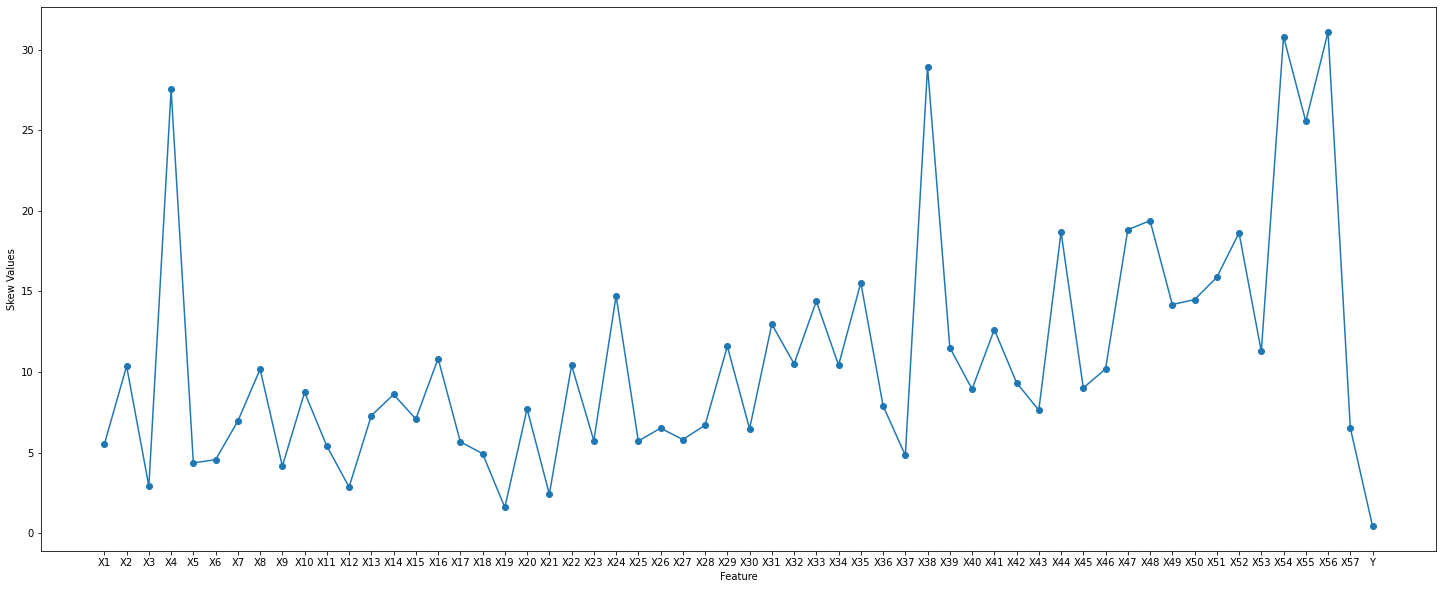

In [ ]:
# plot showing the Skew values for every feature

plt.figure(figsize=(25,10))
plt.xlabel('Feature')
plt.ylabel('Skew Values')
plt.plot(data.skew(axis = 0), marker='o')
plt.show()

### Analysis of features

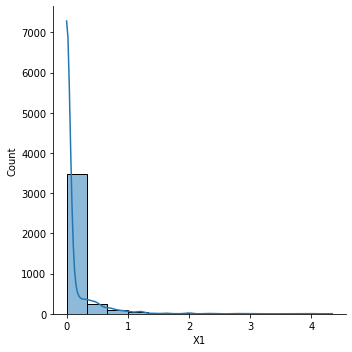

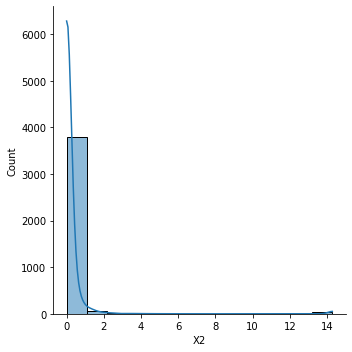

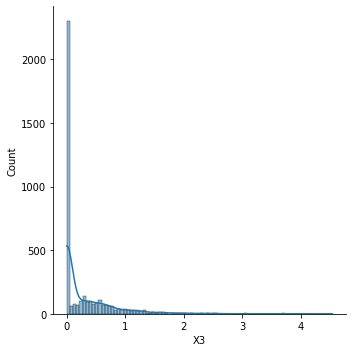

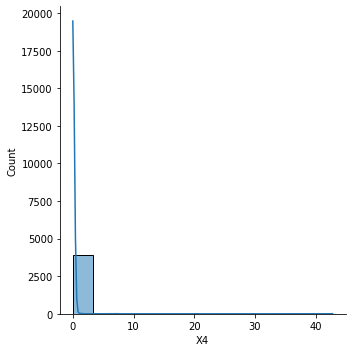

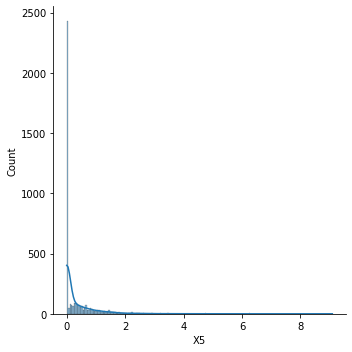

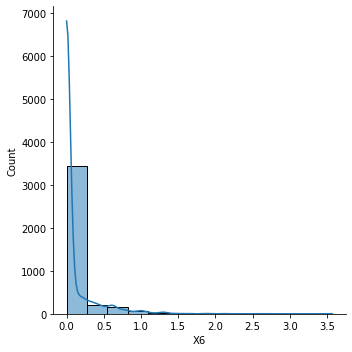

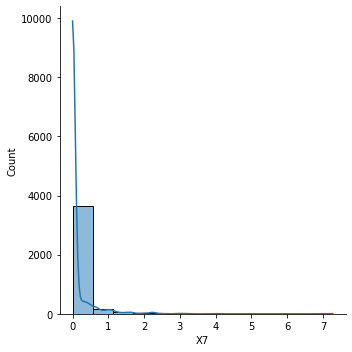

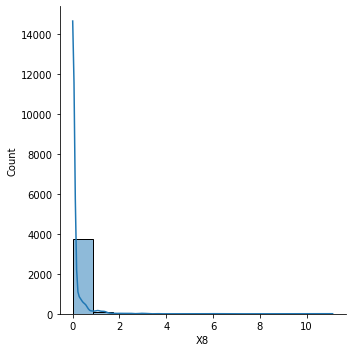

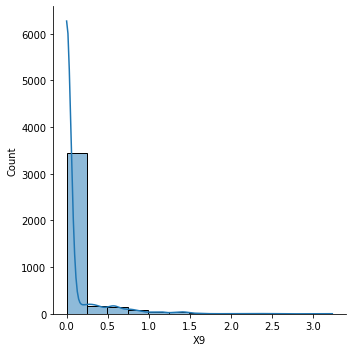

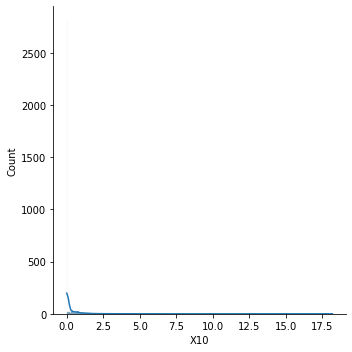

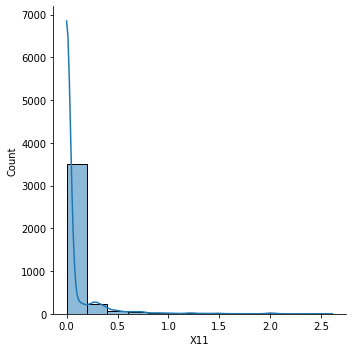

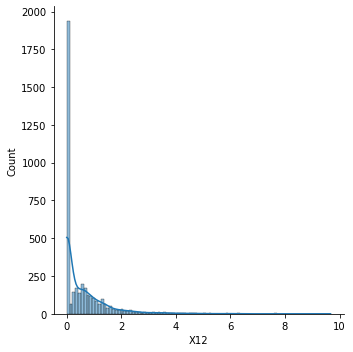

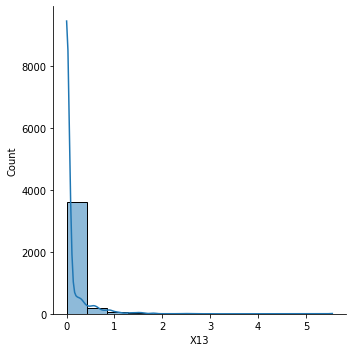

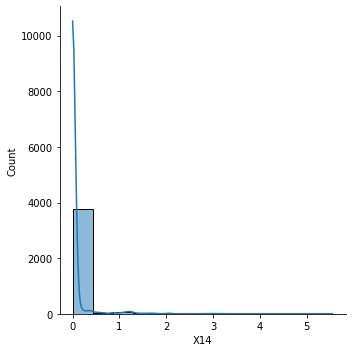

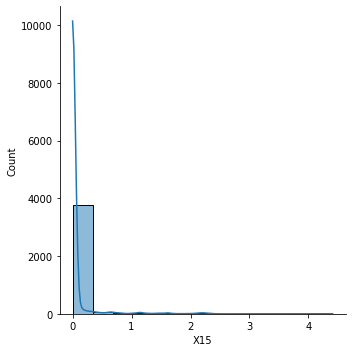

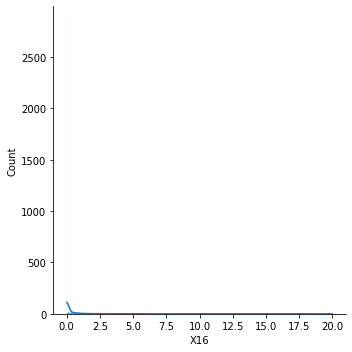

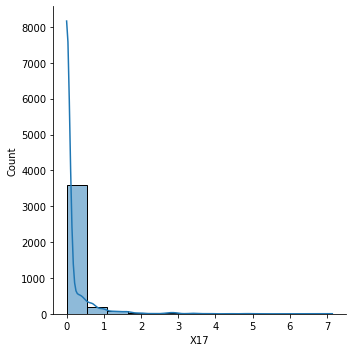

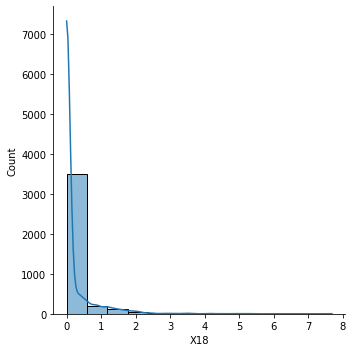

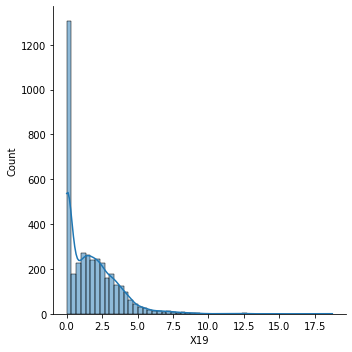

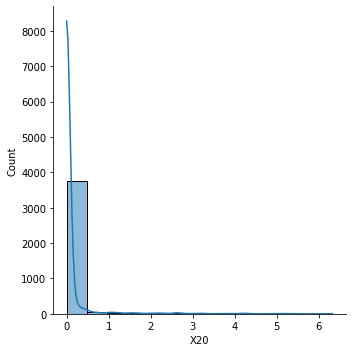

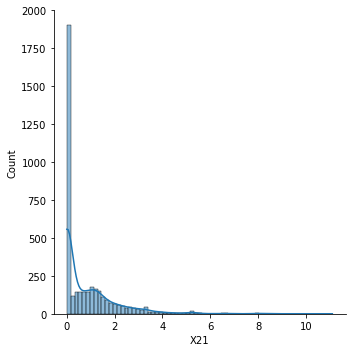

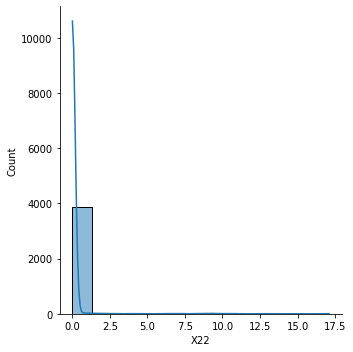

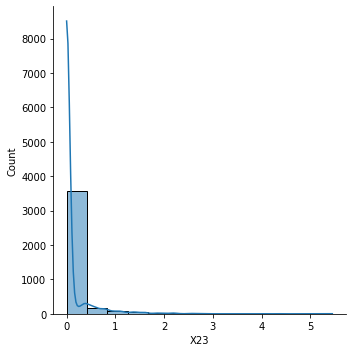

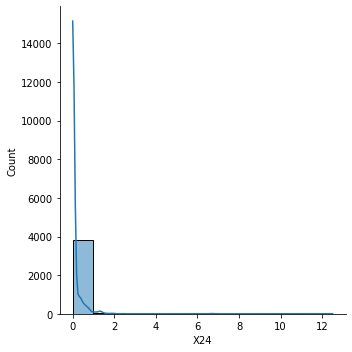

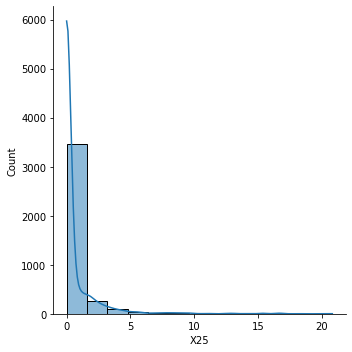

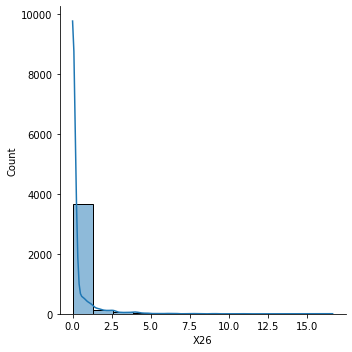

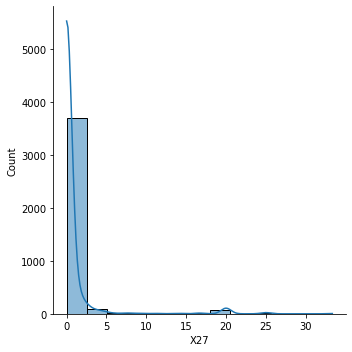

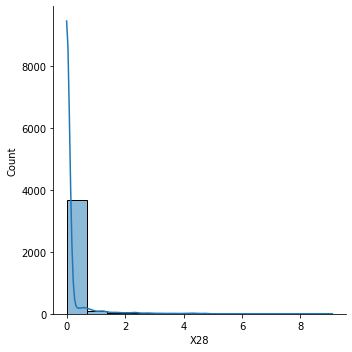

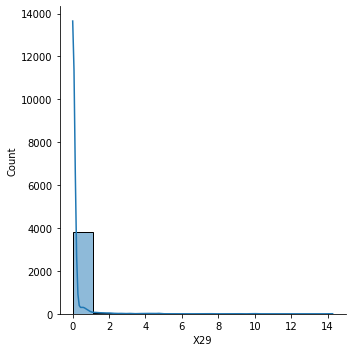

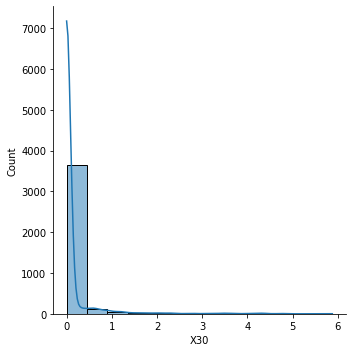

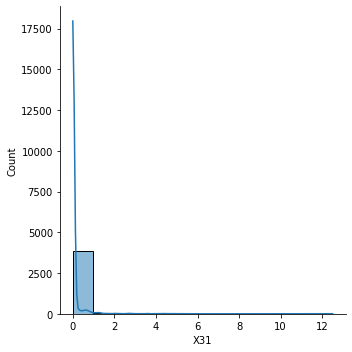

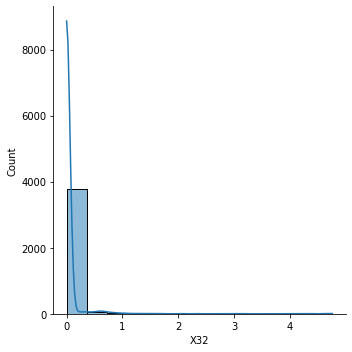

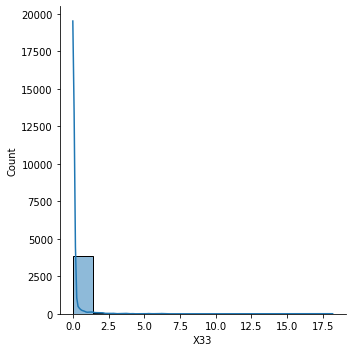

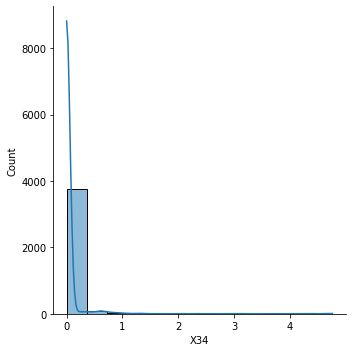

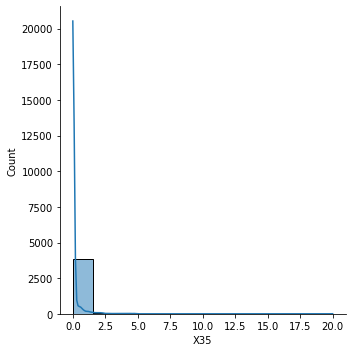

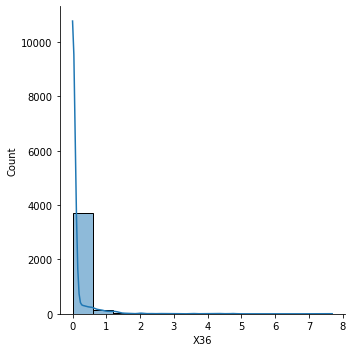

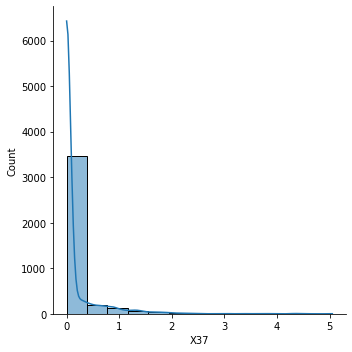

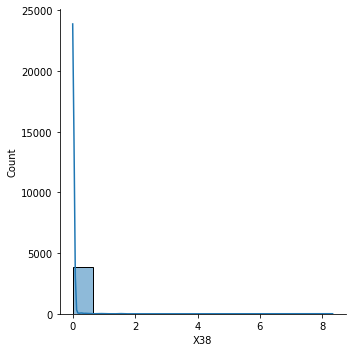

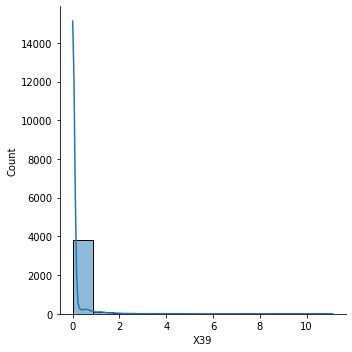

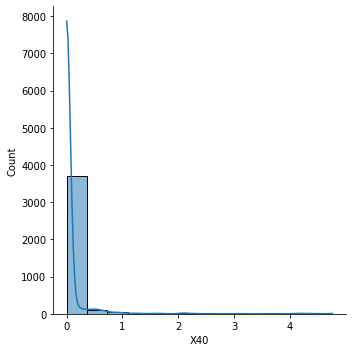

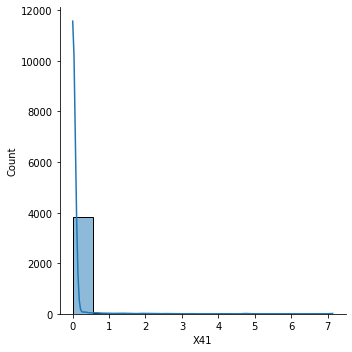

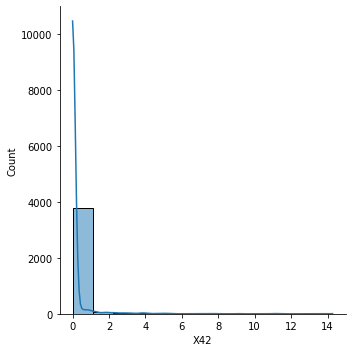

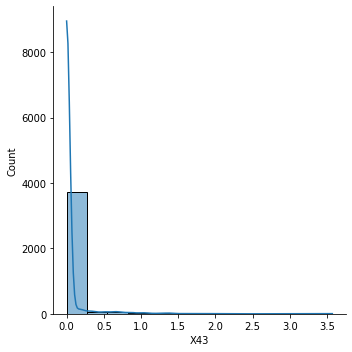

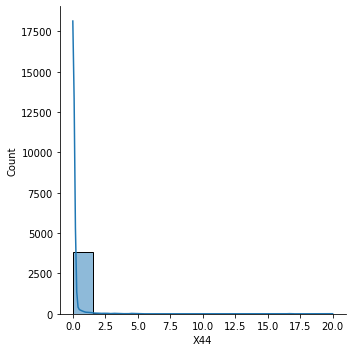

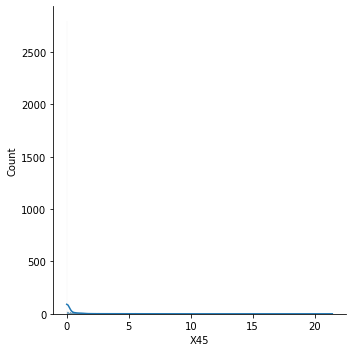

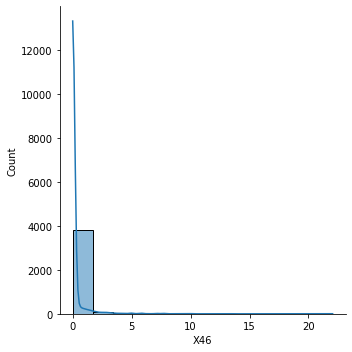

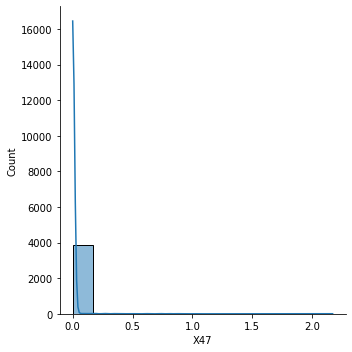

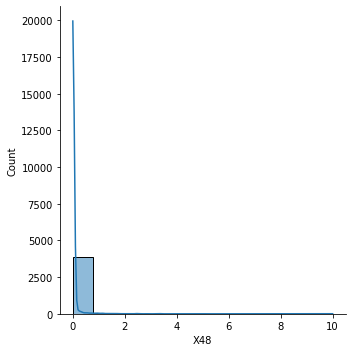

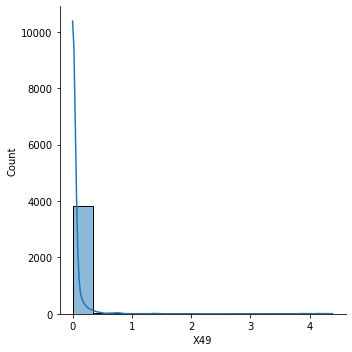

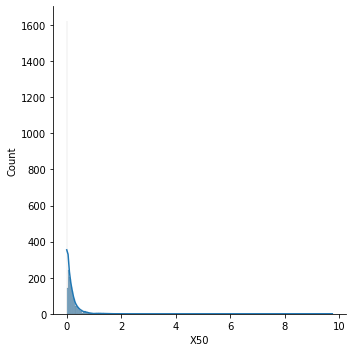

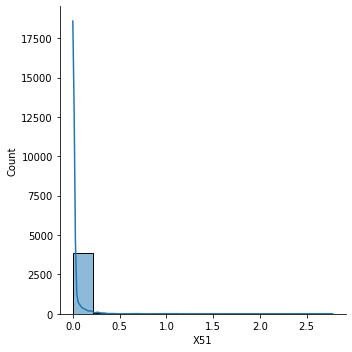

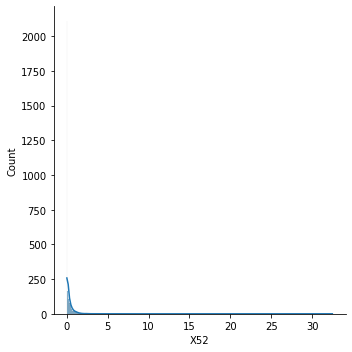

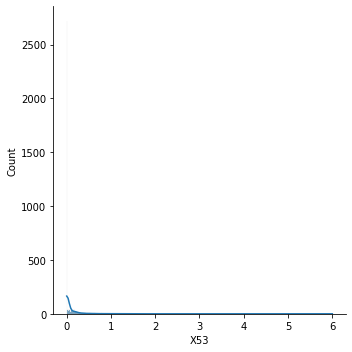

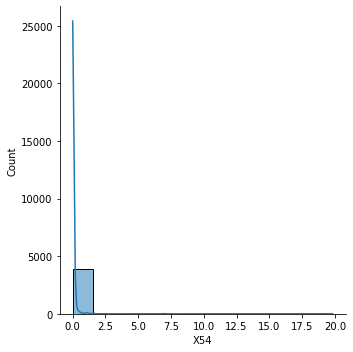

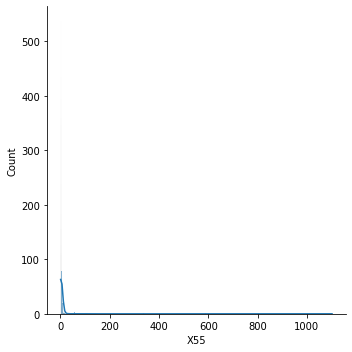

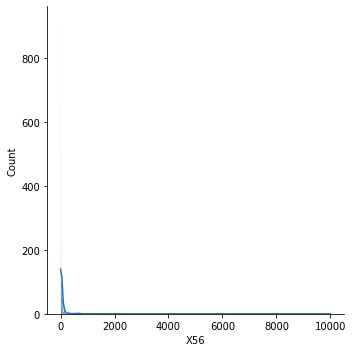

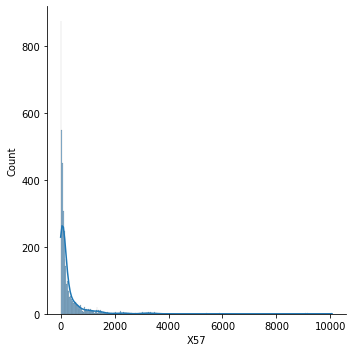

In [ ]:
from matplotlib import rcParams
for col in data.columns:
    if col !='Y':
        rcParams['figure.figsize'] = 9,5
        sns.displot(data[col], kde=True)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

### Inference
* We can see almost all of data is left skewed.
* We can address skewed variables by transforming them. 
* Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x).

# Correlation
* Correlation tells us whether one of multiple features depend on another feature.
* We can say that two variables are highly correlated if they have correlations above 0.5 or 0.7 depeneding on our threshold.
* Multicollinearity - Happens when one feature can be predicted by other or combination of other features with high accuracy.

* Decision Trees and Boosted Trees algorithm are not affected by correlation as their algorithm doesn't make any assumptions about it.
* Logistic Regression and Linear Regression are affected by this problem.
* There are two methods to detect correlation
* Pearson Correlation Coefficient - Used when there is roughly linear relationship between features.
* Spearman Correlation Coefficient - Used when there is non-linear relationship between features.

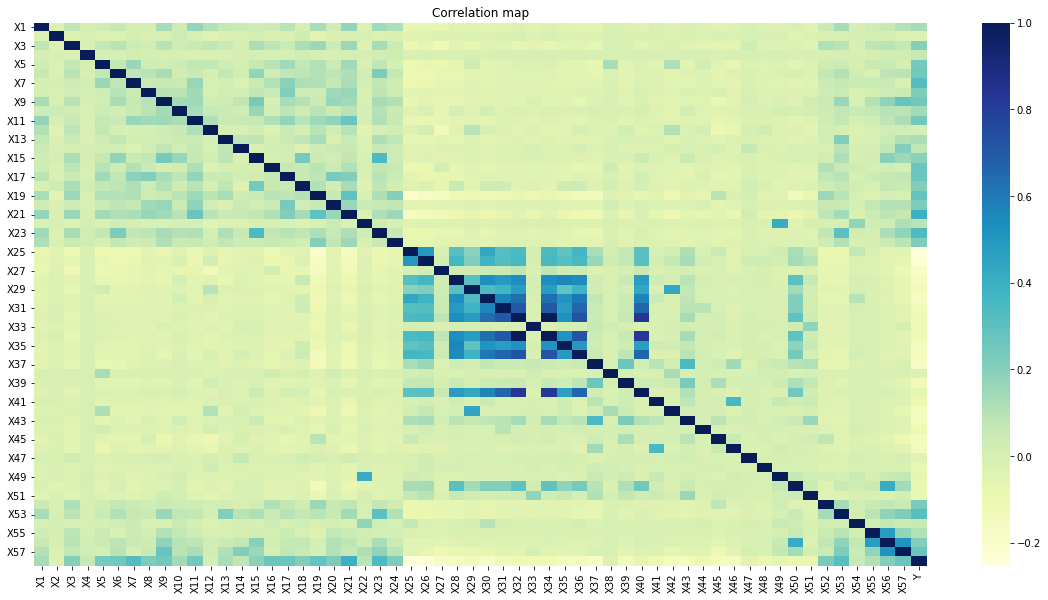

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.title("Correlation map")
plt.show()

Mapping a 57 x 57 matrix via heatmap is a tough task

In [ ]:
data.drop('Y',axis =1).corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,...,-0.023943,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,...,-0.015188,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,...,-0.028276,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,...,-0.001247,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,...,-0.033886,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402
X6,0.060360,-0.023827,0.093120,-0.008594,0.065459,1.000000,0.074811,0.095892,0.132624,0.015163,...,-0.033412,-0.015690,-0.004675,-0.031567,0.065323,0.104906,0.020024,-0.010804,0.083647,0.086964
X7,0.004934,0.006748,0.037979,0.015680,0.157810,0.074811,1.000000,0.047656,0.057607,0.048401,...,-0.030549,-0.035855,-0.049371,-0.035751,0.044416,0.060073,0.043426,0.040228,0.053253,-0.008160
X8,0.002262,-0.014461,0.018314,0.004700,0.030440,0.095892,0.047656,1.000000,0.097821,0.085445,...,-0.021824,-0.028603,-0.032195,-0.023941,0.032774,0.052817,-0.009910,0.013975,0.037654,0.046959
X9,0.128300,0.000199,0.098008,0.000138,0.023903,0.132624,0.057607,0.097821,1.000000,0.138875,...,-0.026076,-0.014399,-0.030304,0.028297,0.046721,0.160436,-0.003807,0.105594,0.181932,0.276767
X10,0.038547,0.035494,0.029760,-0.002183,0.038379,0.015163,0.048401,0.085445,0.138875,1.000000,...,-0.015282,0.013110,0.001187,0.012993,0.038433,0.069121,0.048458,0.068394,0.097029,0.092385


Correlataion is difficult to perceive here

## Log Transformation
* This is a part of feature engineering but still we are performing it here to get bettern insights about outliers.
* Log gives a measurement of how "big" a number is in comparision to another number (base of log).
* Further, the larger values tend to bias the model and influence them to a great extent.
* Logarithm scales the data, reduces the range of data, brings linearity to the data and removes skewness to a certain extent while preserving the distribution.

In [ ]:
# Log transform the data
log_data = data.copy() # Will not affect the real dataset
for col in log_data.columns:
    if col != "Y":
        log_data[col] = np.log1p(log_data[col])

In [ ]:
# pd.pandas.set_option('display.max_columns', None)
log_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.000000,0.000000,1.675226,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.851005,0.000000,0.000000,0.788457,1.098612,2.564949,0
1,0.000000,0.444686,0.444686,0.000000,0.751416,0.444686,1.178655,0.000000,0.0,0.444686,...,0.0,0.079735,0.0,0.407463,0.000000,0.079735,2.850938,5.003946,5.929589,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,1.791759,0
3,0.494696,0.000000,0.494696,0.000000,1.075002,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.379805,0.314811,0.000000,1.235471,3.135494,4.812184,1
4,0.457425,0.000000,0.000000,3.596216,0.457425,0.000000,0.457425,0.457425,0.0,0.000000,...,0.0,0.000000,0.0,0.214305,0.214305,0.000000,1.467413,4.820282,5.337538,1


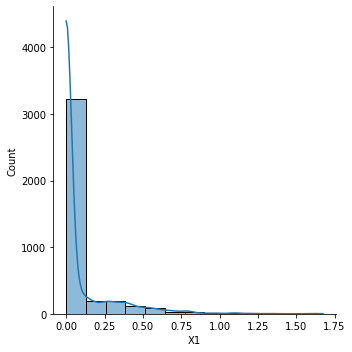

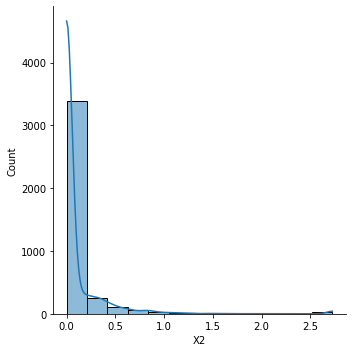

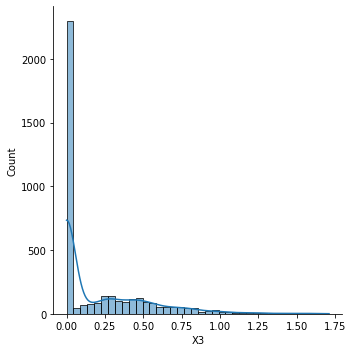

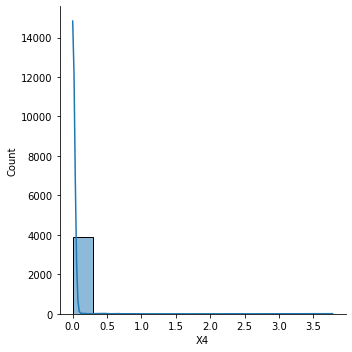

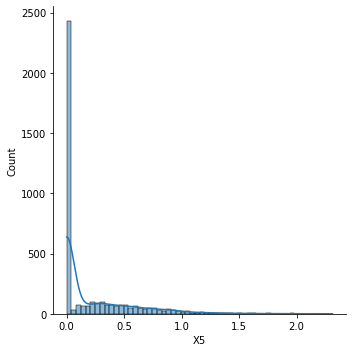

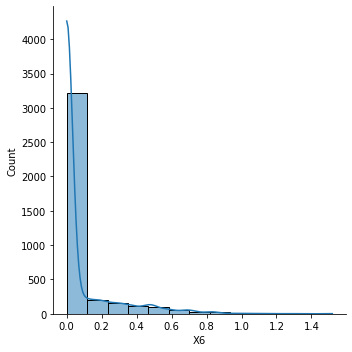

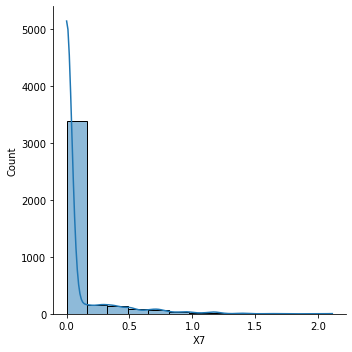

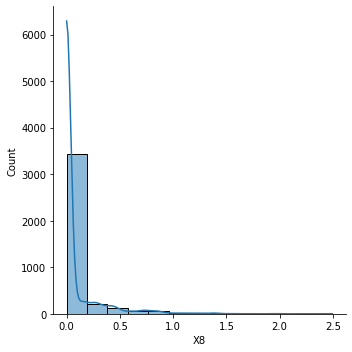

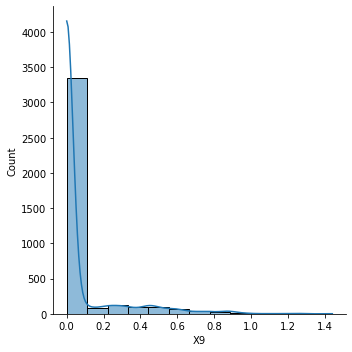

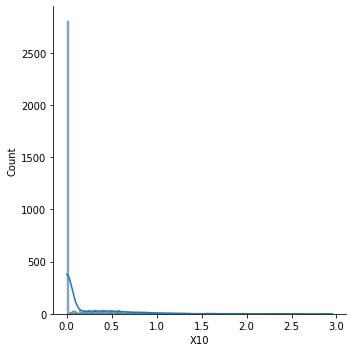

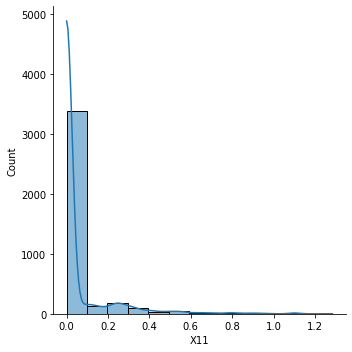

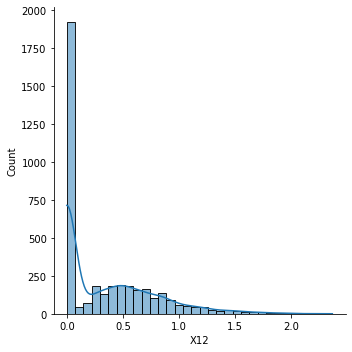

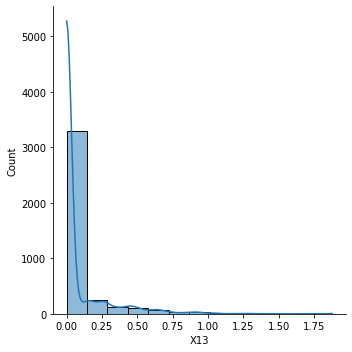

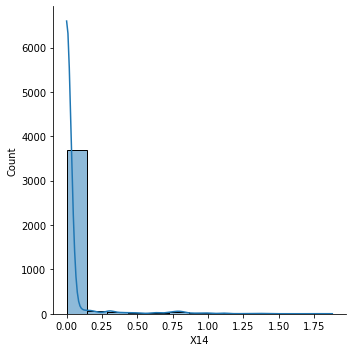

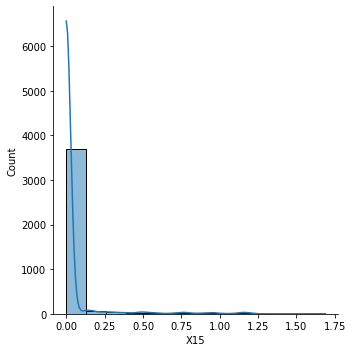

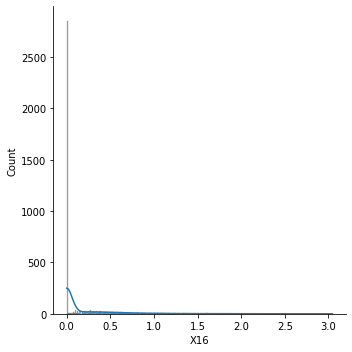

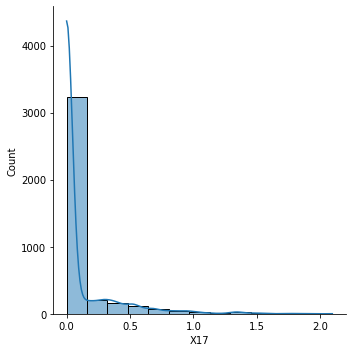

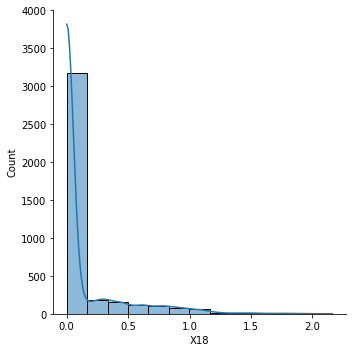

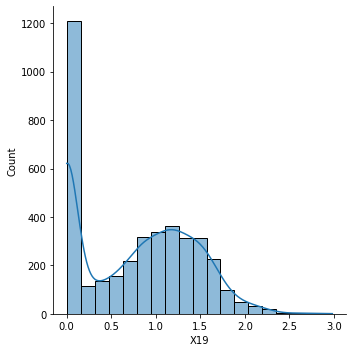

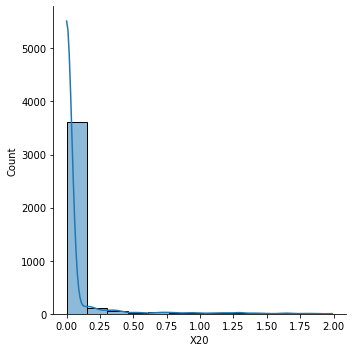

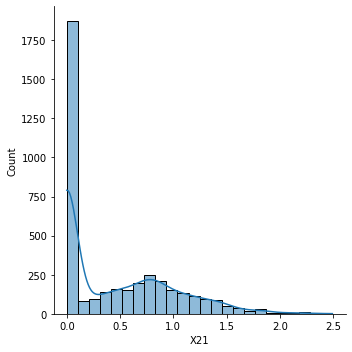

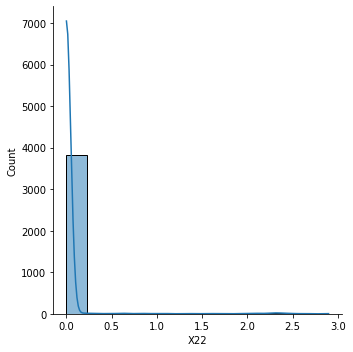

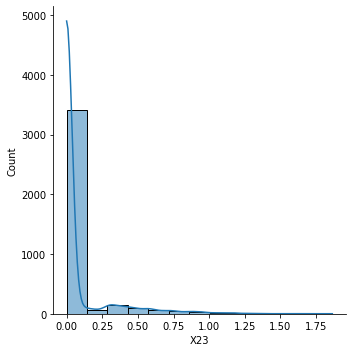

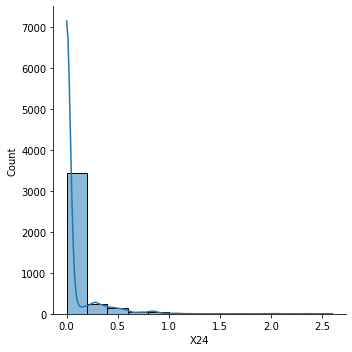

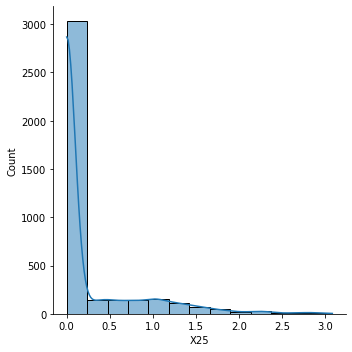

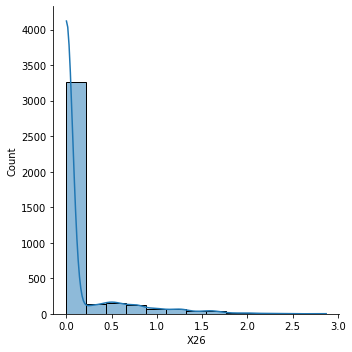

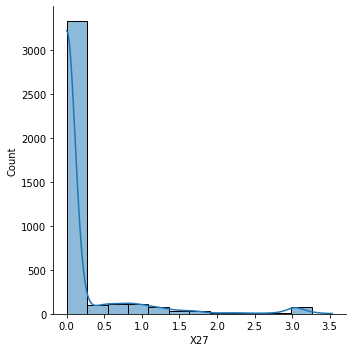

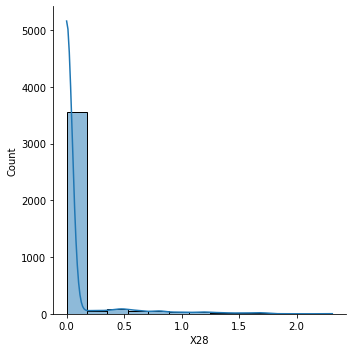

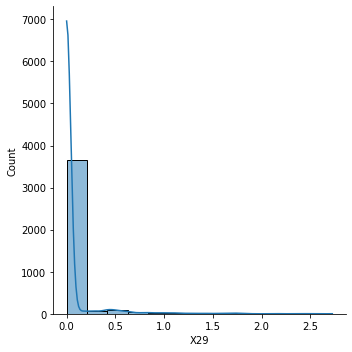

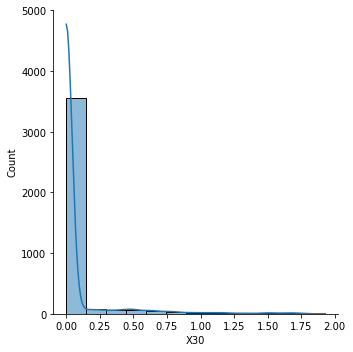

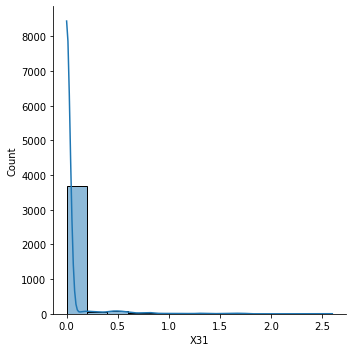

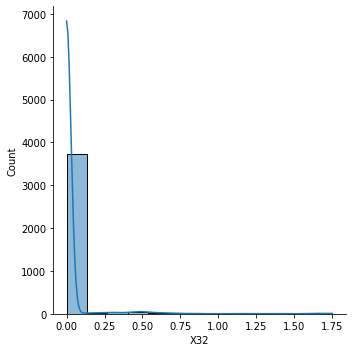

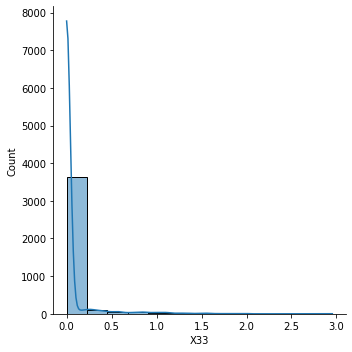

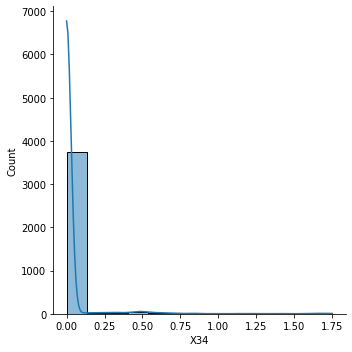

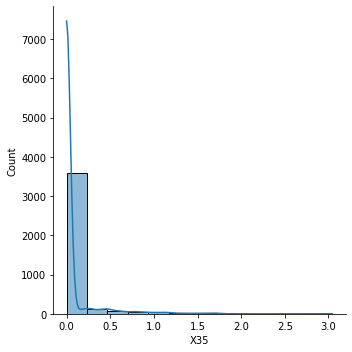

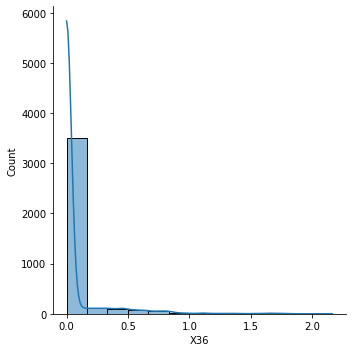

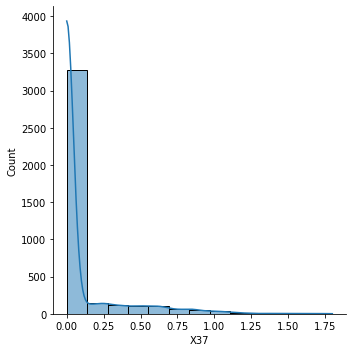

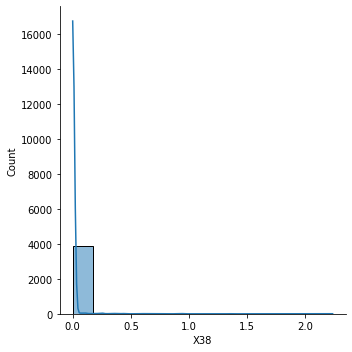

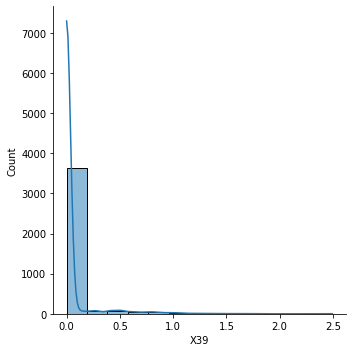

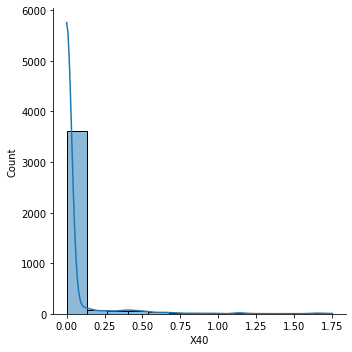

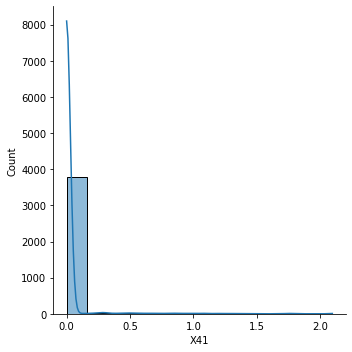

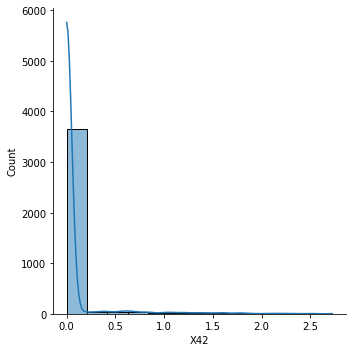

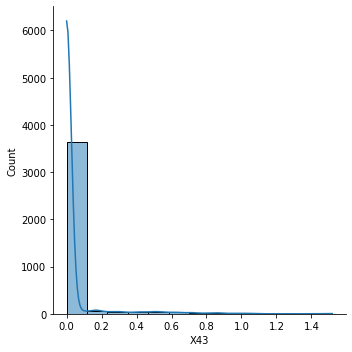

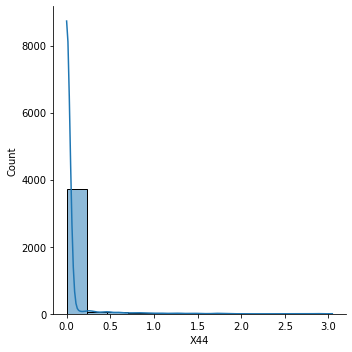

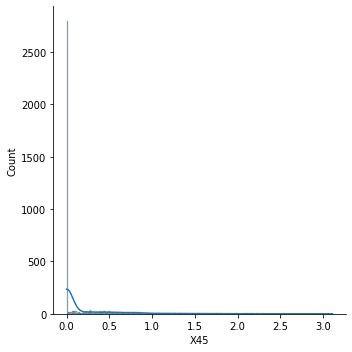

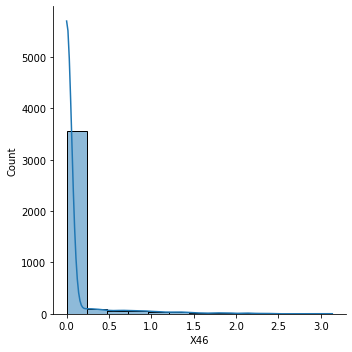

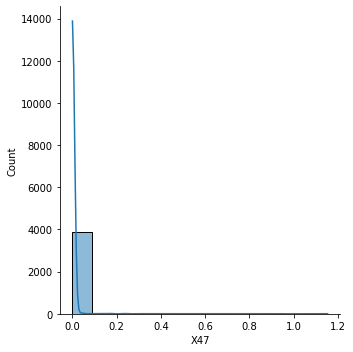

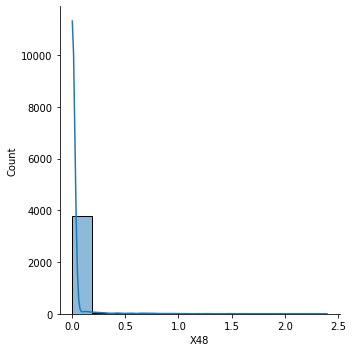

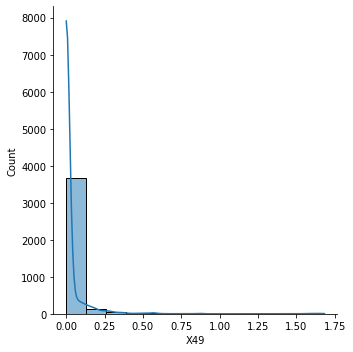

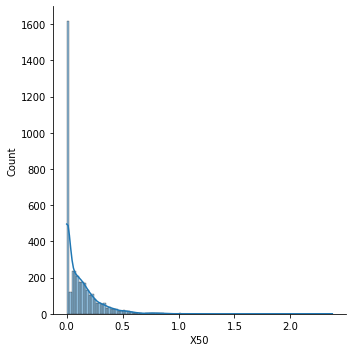

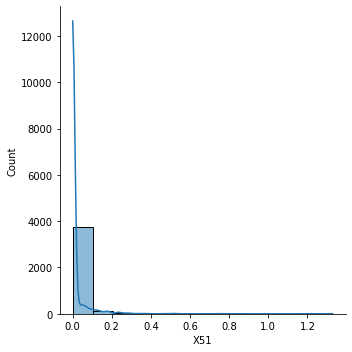

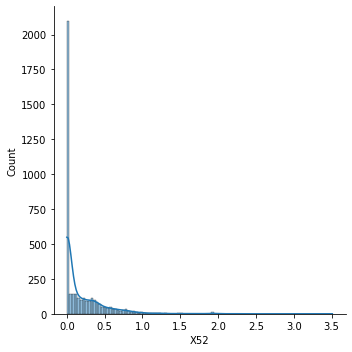

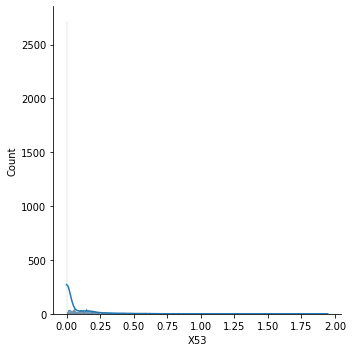

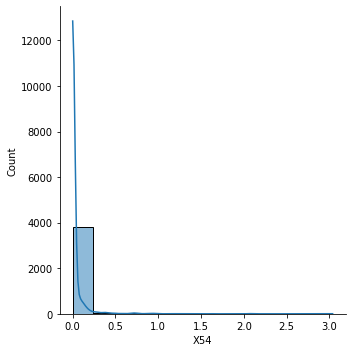

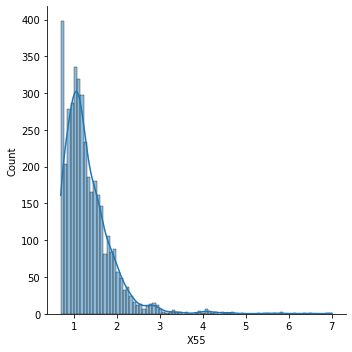

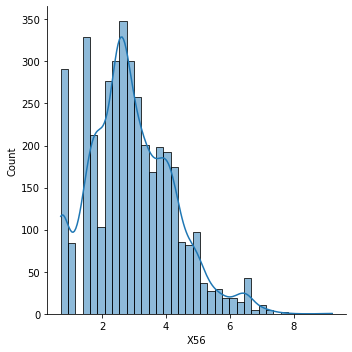

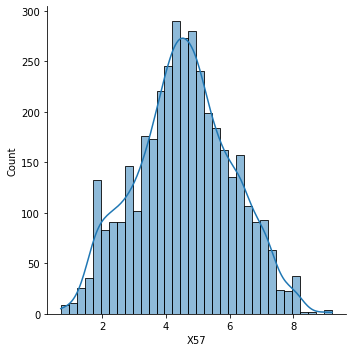

In [ ]:
for col in log_data.columns:
    if col !='Y':
        sns.displot(log_data[col], kde=True)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

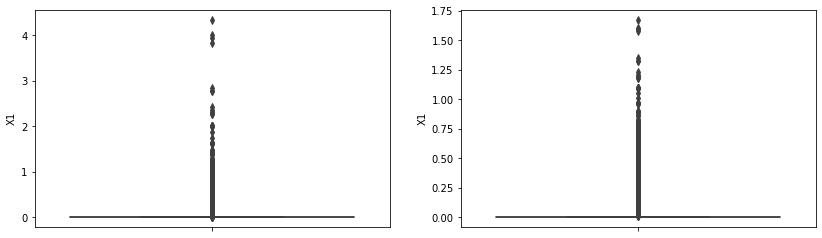

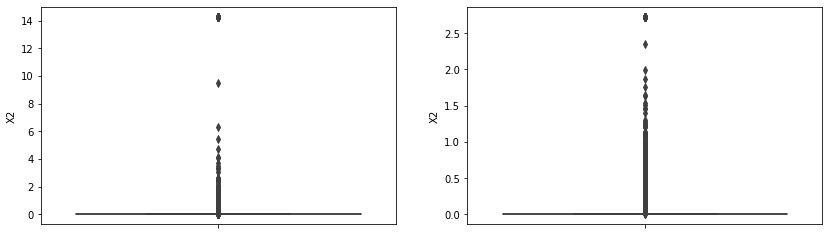

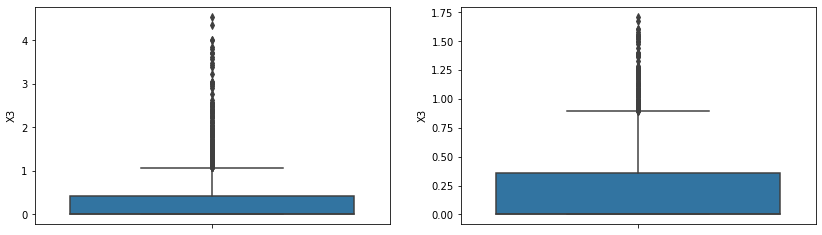

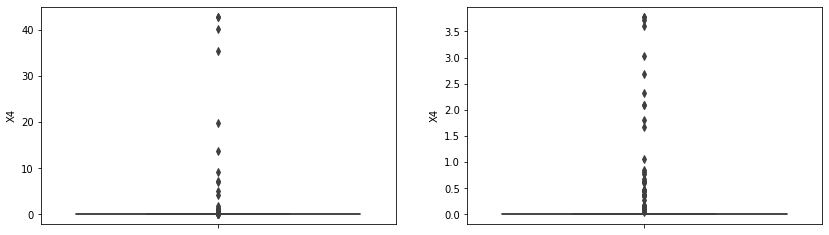

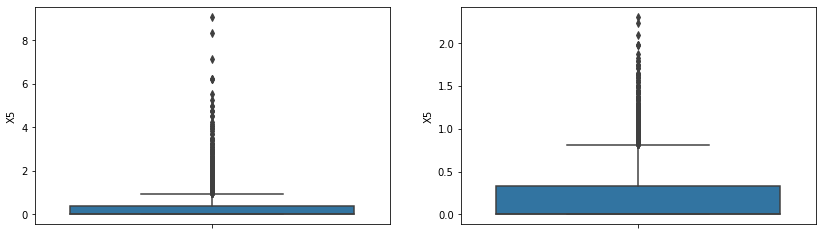

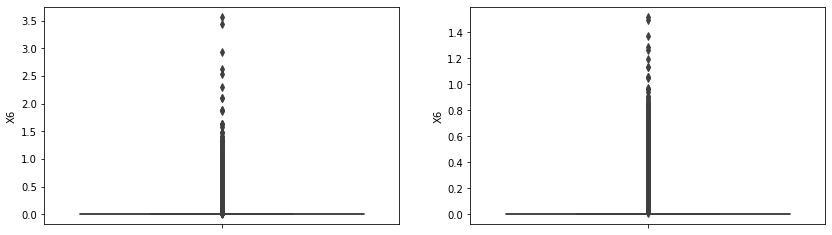

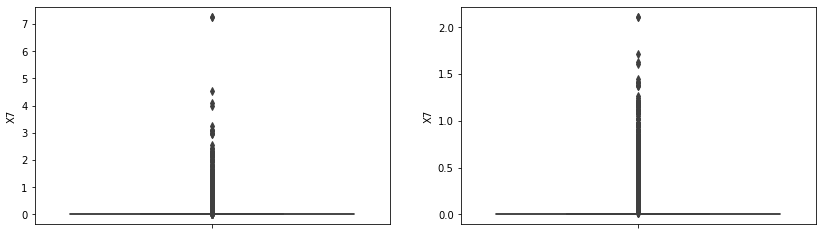

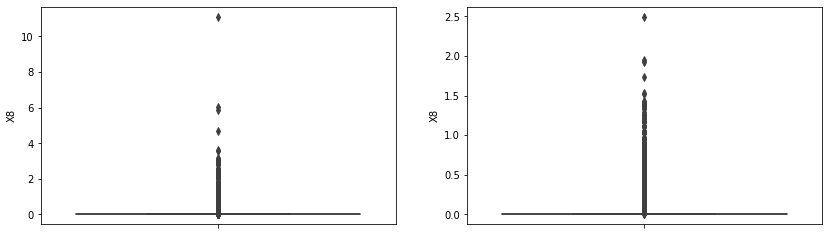

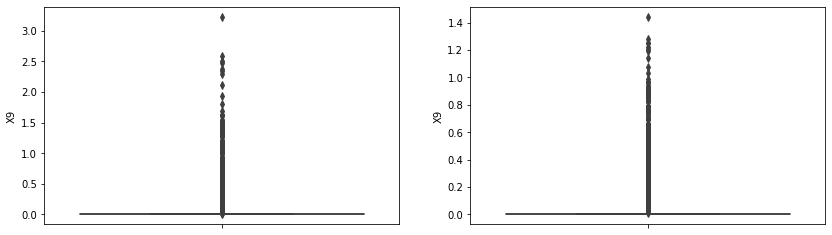

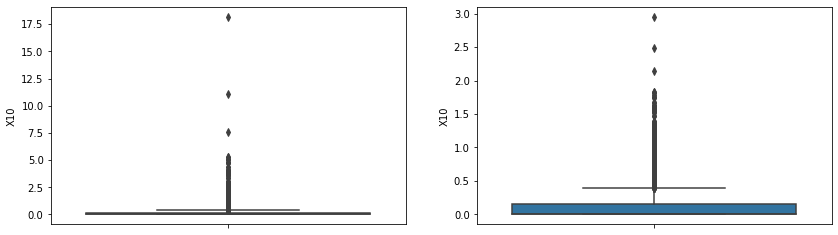

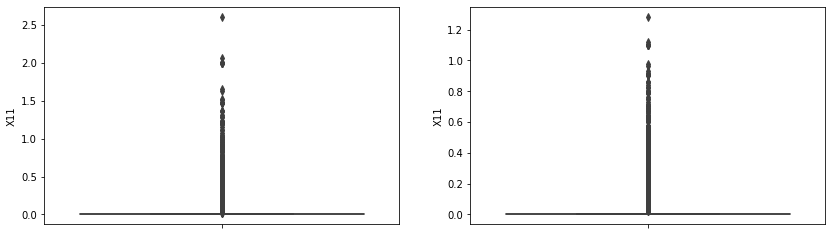

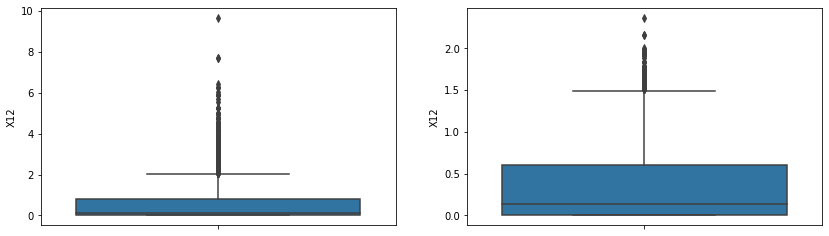

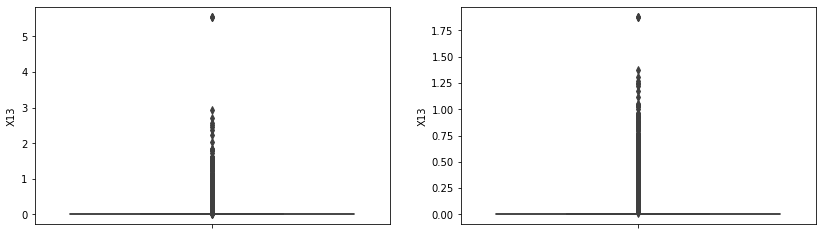

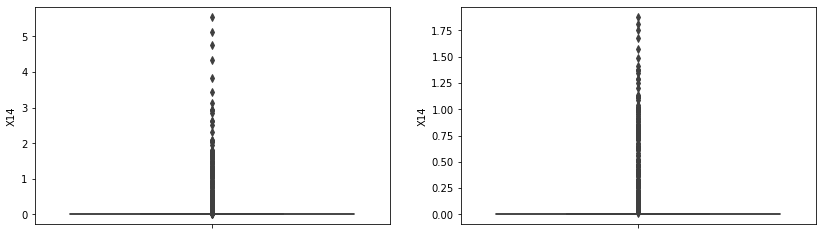

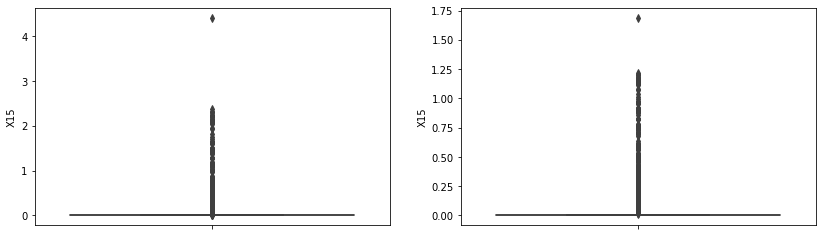

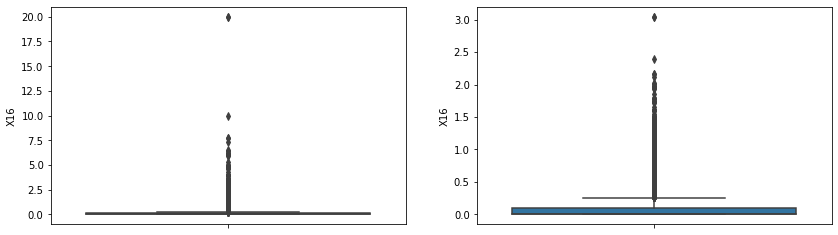

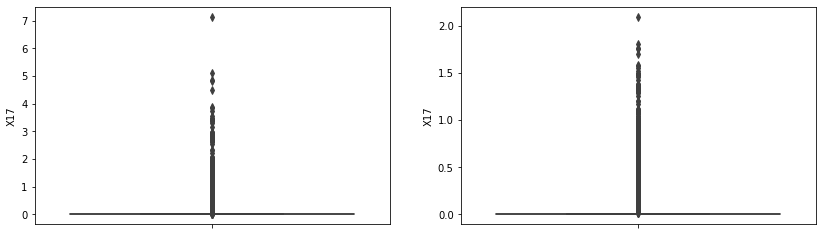

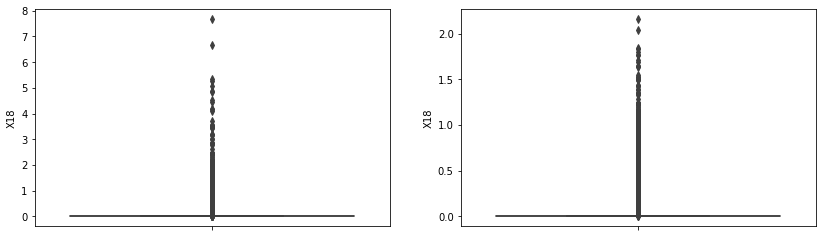

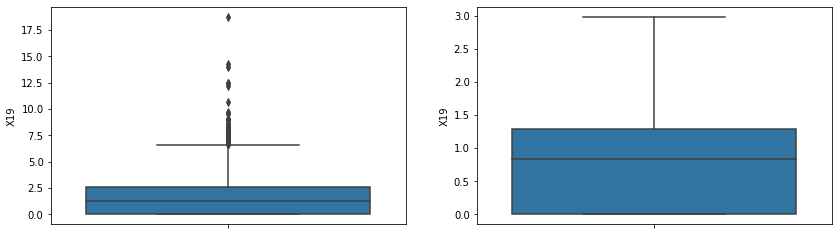

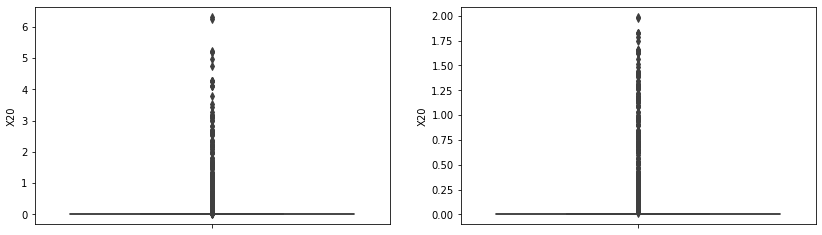

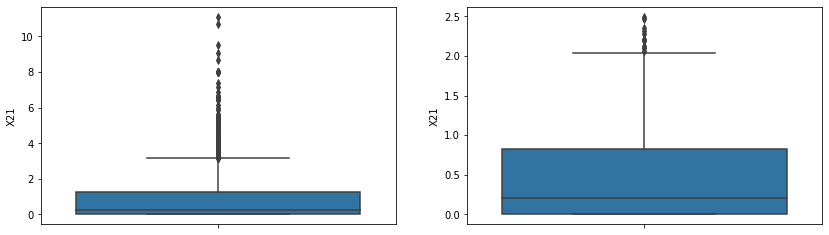

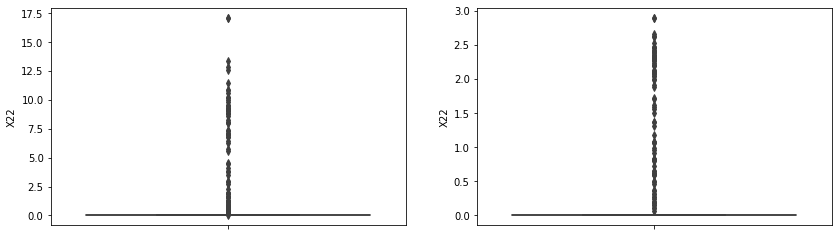

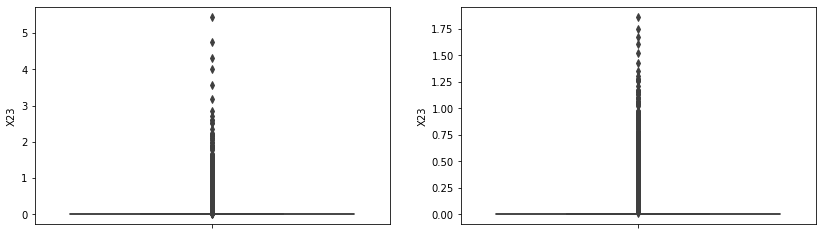

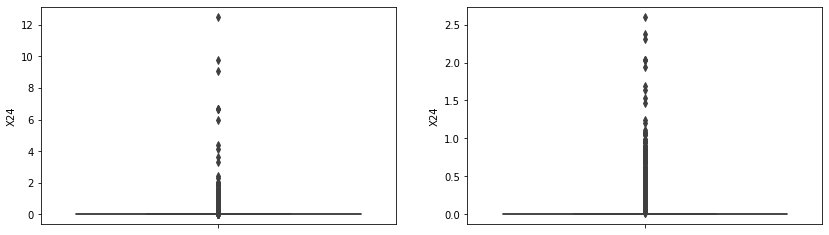

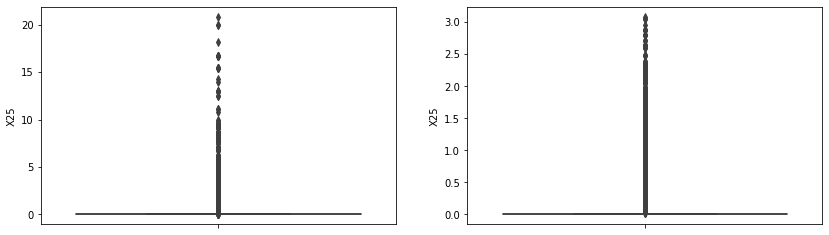

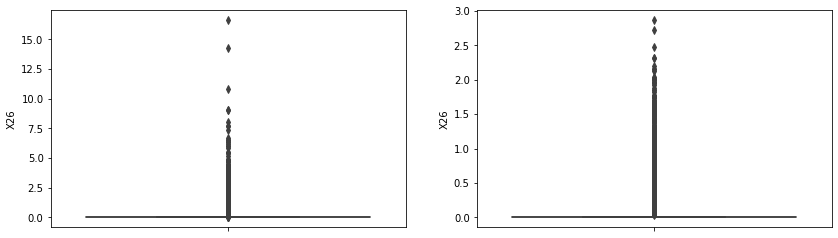

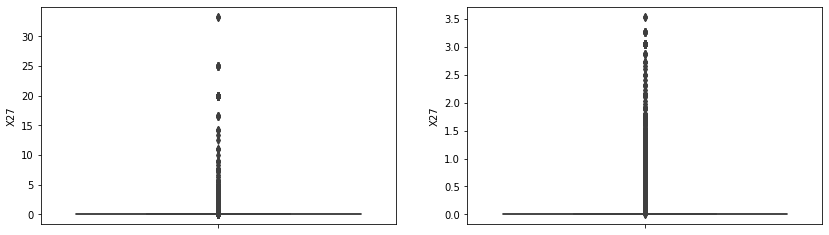

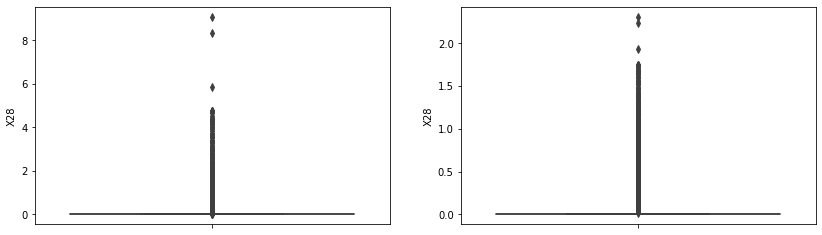

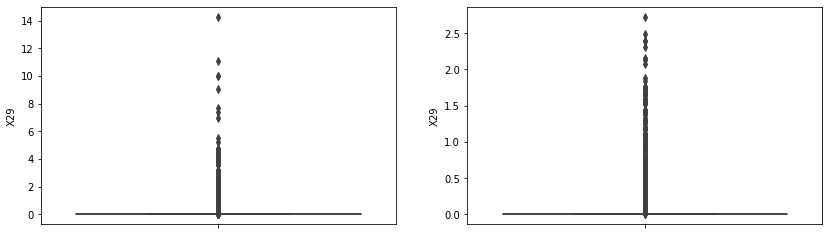

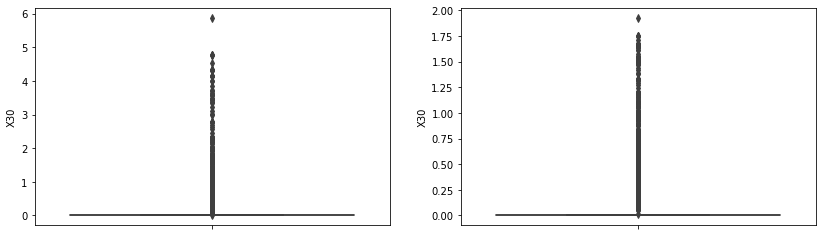

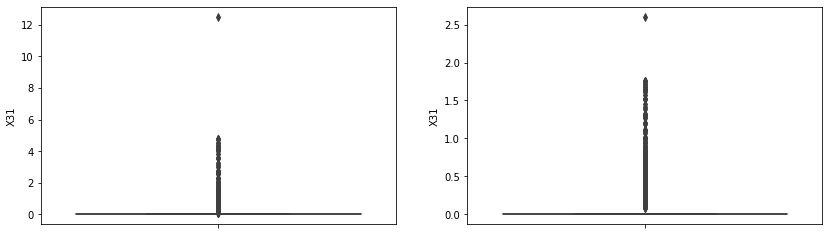

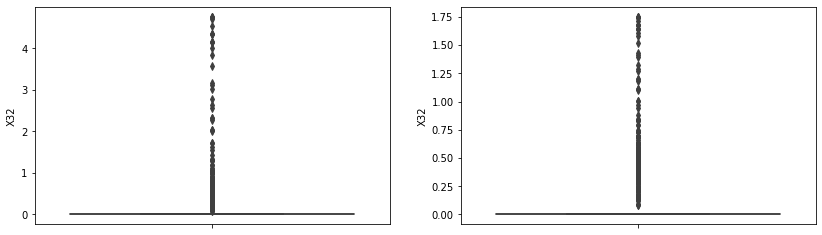

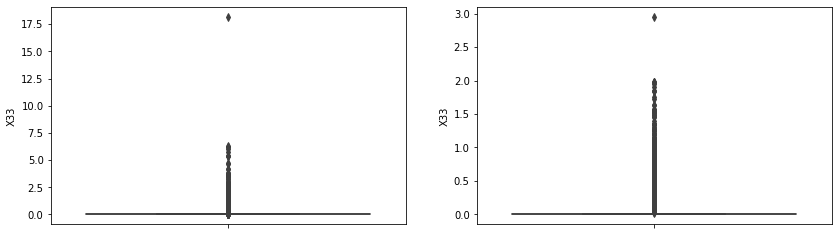

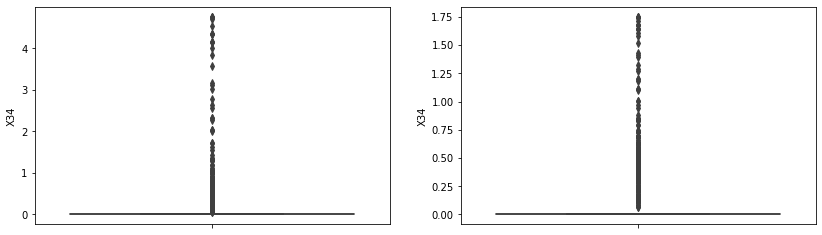

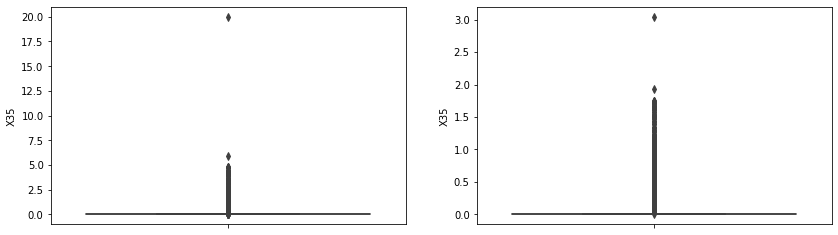

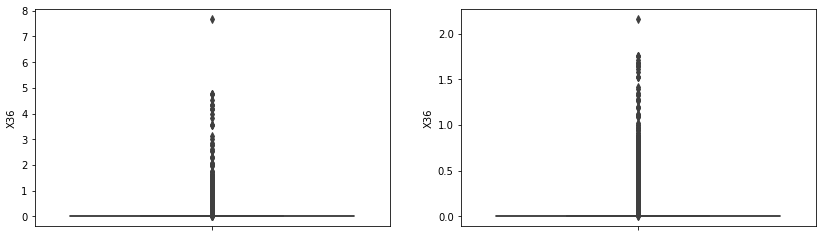

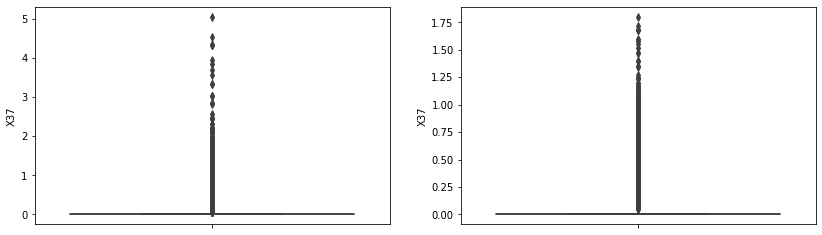

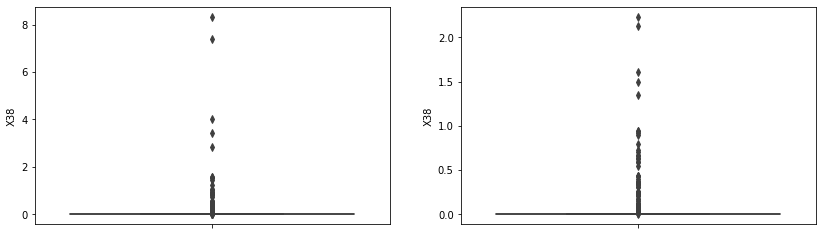

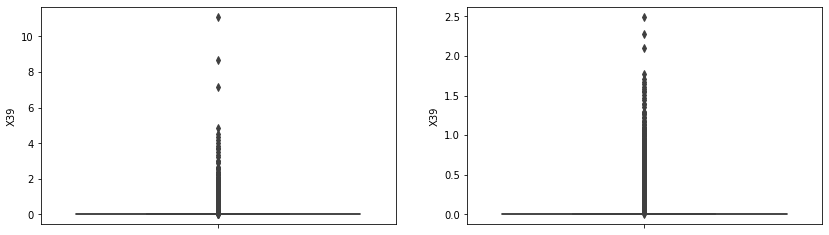

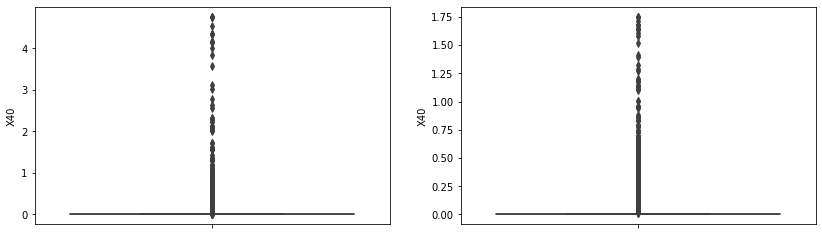

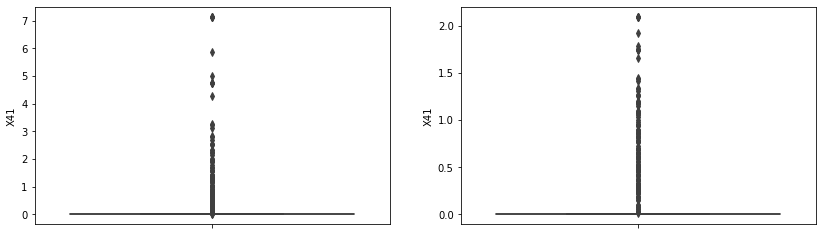

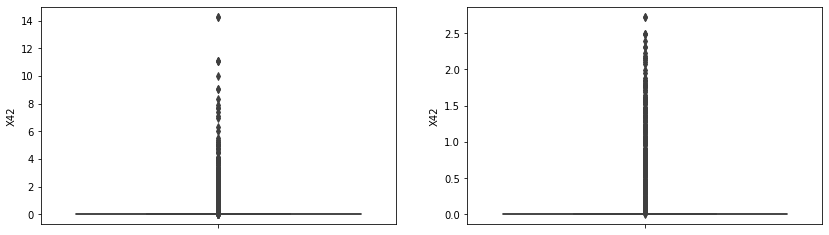

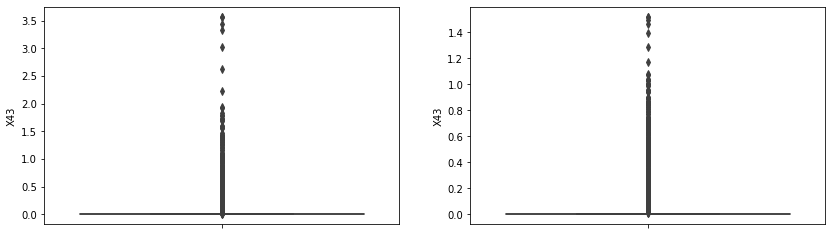

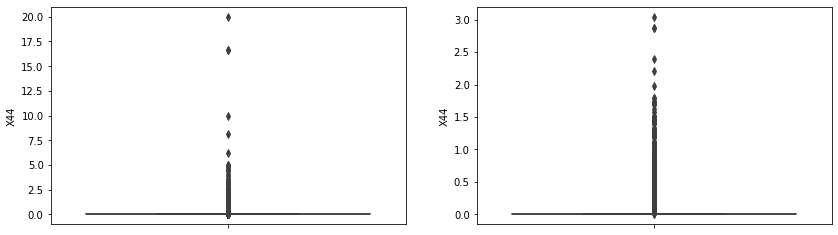

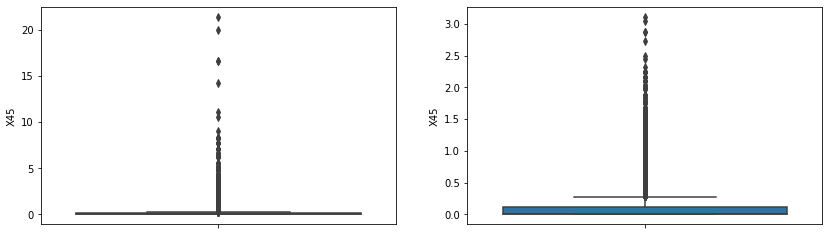

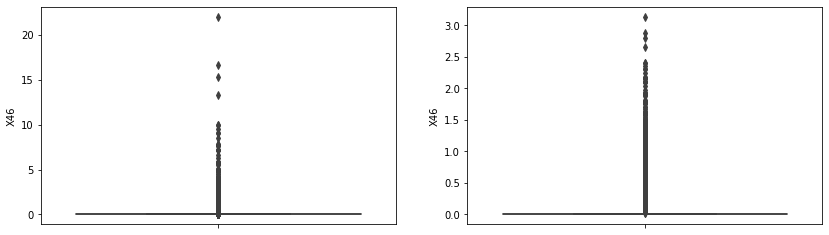

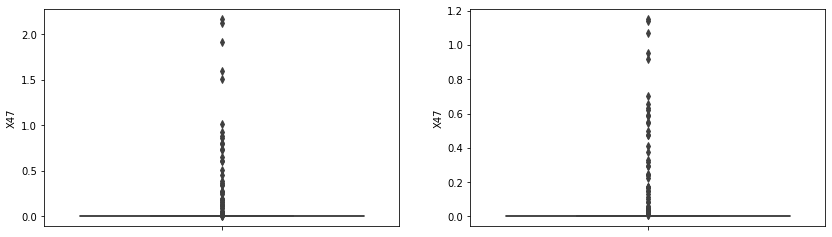

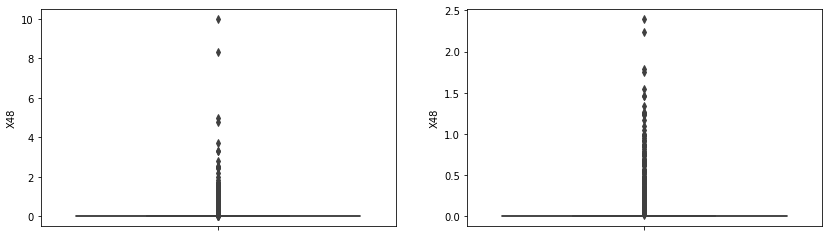

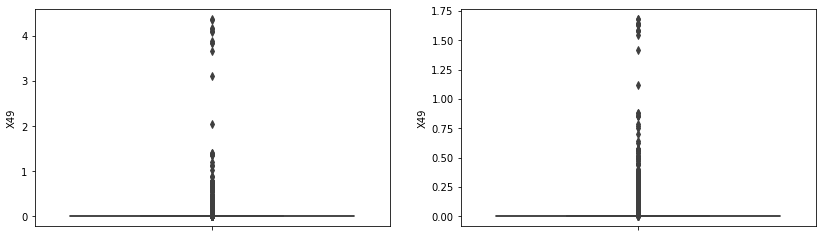

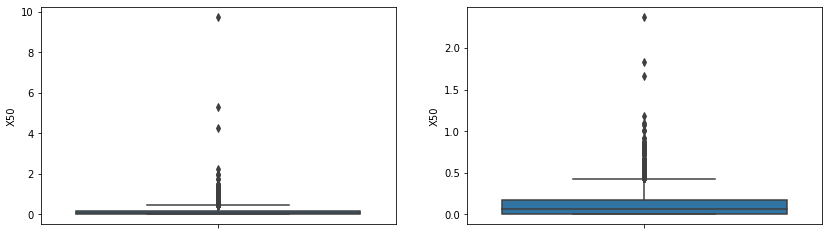

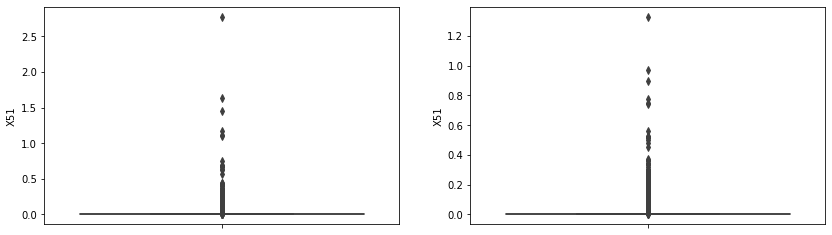

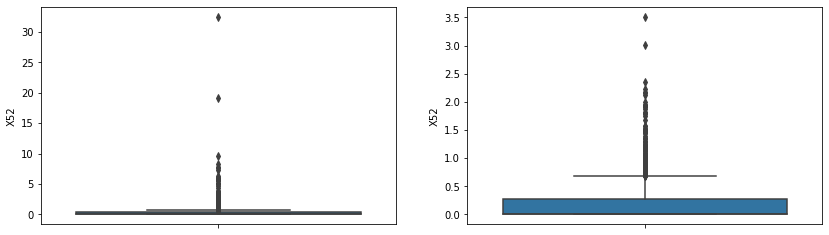

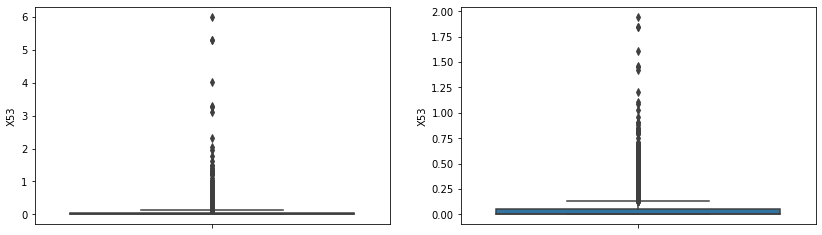

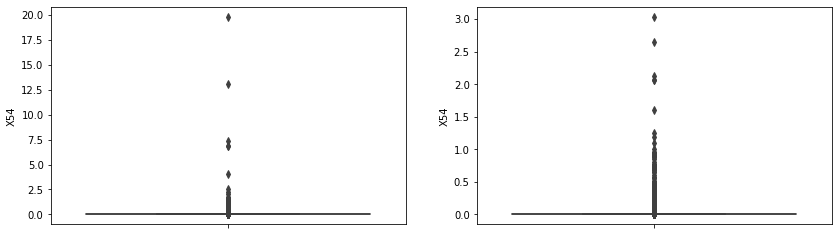

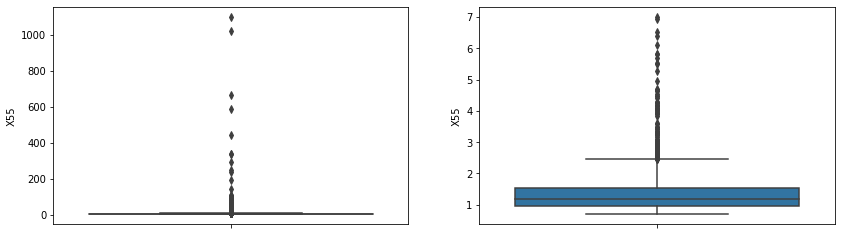

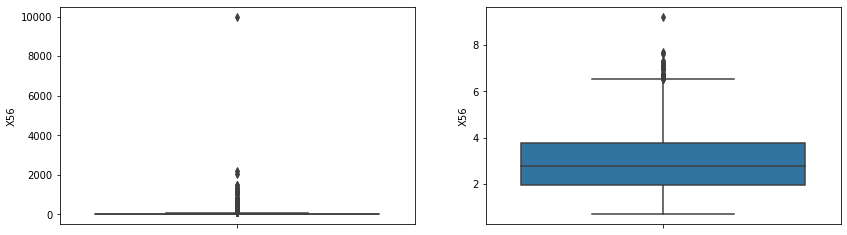

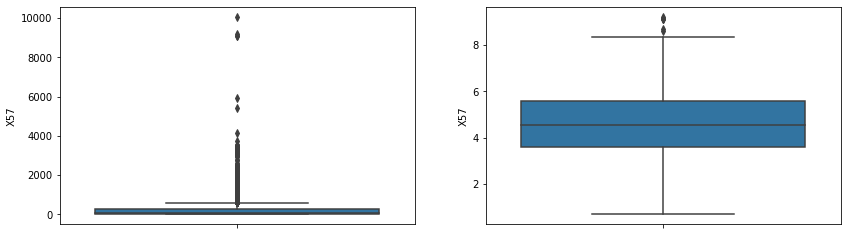

In [ ]:
# Checking for outliers now.
for col in data.columns:    
    if col == 'Y':
        continue
    figure, axes = plt.subplots(1,2, figsize=(14,4))
    sns.boxplot(ax = axes[0],y=data[col])
    sns.boxplot(ax = axes[1],y=log_data[col])
    plt.ylabel(col)
    plt.show()

### Inference
* Still presence of lot of outliers
* Data is still skewed after log transformations.
* We will try to use algorithms based on trees since they are not much affected by skewness of data

## Feature Selection using statistical tests
Feature selection techniques that can be used for numerical input data and a categorical (class) target variable.
1. ANOVA-f Statistic.
2. Mutual Information Statistics.

#### ANOVA-f test
ANOVA means Analysis of Variance and is used to determine whether the means from two or more samples of data come from the same distribution or not.
F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA.

#### Mutual Information Statistics
Mutual information is the application of information gain (typically used with decision trees) to feature selection.
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

### Feature Selection with ANOVA F-test

Feature X1: 60.229467
Feature X2: 2.372980
Feature X3: 129.475185
Feature X4: 8.917299
Feature X5: 185.161138
Feature X6: 197.971396
Feature X7: 360.826096
Feature X8: 162.100066
Feature X9: 212.731073
Feature X10: 65.572703
Feature X11: 199.497952
Feature X12: 0.069052
Feature X13: 61.583666
Feature X14: 22.277649
Feature X15: 123.243331
Feature X16: 210.703137
Feature X17: 260.139148
Feature X18: 147.083274
Feature X19: 244.916102
Feature X20: 155.020734
Feature X21: 564.251269
Feature X22: 20.894963
Feature X23: 381.788811
Feature X24: 148.089956
Feature X25: 209.935708
Feature X26: 170.169099
Feature X27: 110.155601
Feature X28: 74.843451
Feature X29: 62.781024
Feature X30: 94.952892
Feature X31: 52.695178
Feature X32: 44.188742
Feature X33: 40.281131
Feature X34: 42.775444
Feature X35: 67.089008
Feature X36: 58.127643
Feature X37: 110.030005
Feature X38: 2.105336
Feature X39: 60.827399
Feature X40: 15.140857
Feature X41: 30.301374
Feature X42: 60.629248
Feature X43: 60.205555
Feat

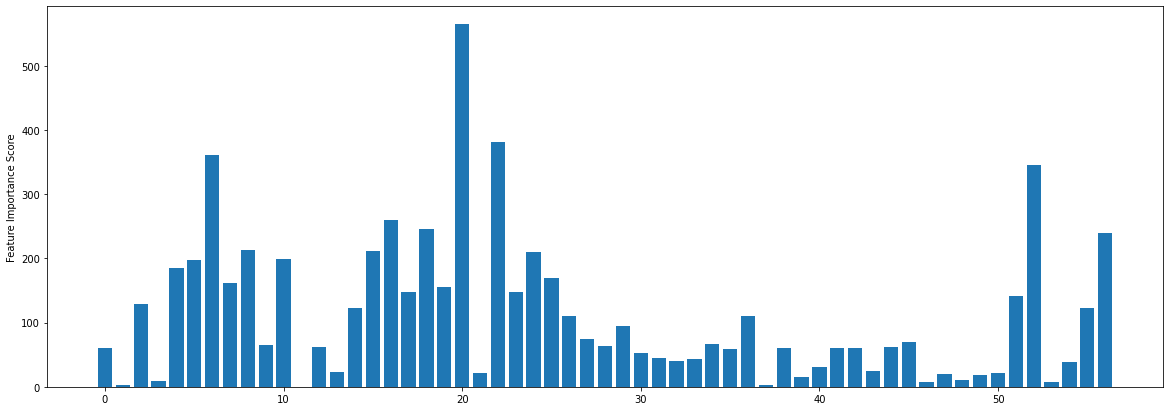

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# load the dataset
def create_XY(data_received):
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = create_XY(data)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_anova.scores_)):
    print('Feature X%d: %f' % (i+1, fs_anova.scores_[i]))

    
# plot the scores
plt.figure(figsize = (20,7))
plt.bar([i for i in range(len(fs_anova.scores_))], fs_anova.scores_)
plt.ylabel('Feature Importance Score')
plt.show()

### Feature Selection with Mutual Information

Feature X1: 0.053243
Feature X2: 0.071075
Feature X3: 0.075135
Feature X4: 0.000262
Feature X5: 0.082978
Feature X6: 0.067496
Feature X7: 0.167158
Feature X8: 0.069102
Feature X9: 0.061940
Feature X10: 0.070616
Feature X11: 0.080749
Feature X12: 0.057637
Feature X13: 0.034542
Feature X14: 0.034845
Feature X15: 0.040773
Feature X16: 0.144761
Feature X17: 0.080942
Feature X18: 0.049895
Feature X19: 0.116088
Feature X20: 0.077701
Feature X21: 0.168934
Feature X22: 0.000000
Feature X23: 0.113628
Feature X24: 0.124146
Feature X25: 0.108366
Feature X26: 0.080197
Feature X27: 0.086189
Feature X28: 0.038861
Feature X29: 0.053863
Feature X30: 0.042844
Feature X31: 0.036986
Feature X32: 0.032272
Feature X33: 0.008941
Feature X34: 0.034025
Feature X35: 0.050508
Feature X36: 0.023357
Feature X37: 0.040507
Feature X38: 0.004683
Feature X39: 0.015831
Feature X40: 0.014736
Feature X41: 0.008887
Feature X42: 0.022175
Feature X43: 0.042008
Feature X44: 0.003750
Feature X45: 0.042559
Feature X46: 0.0455

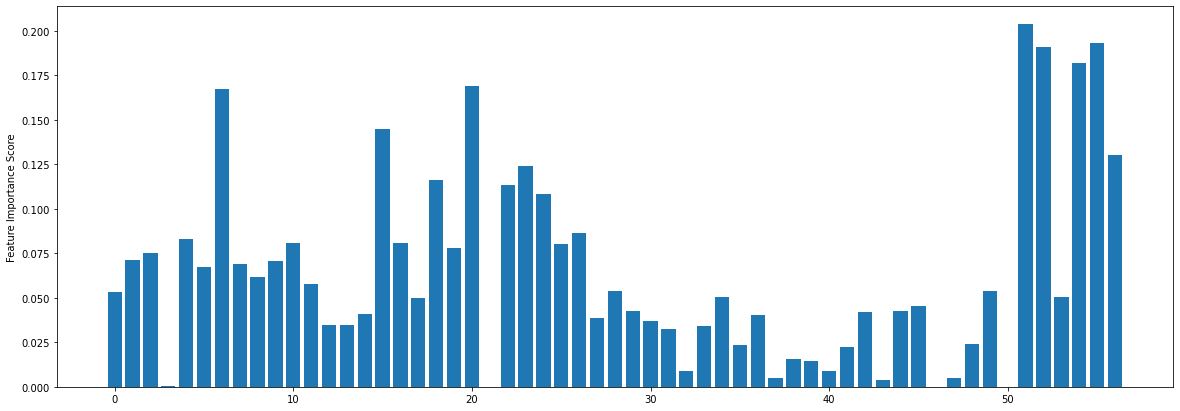

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')    # Mutual info classif
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_mi.scores_)):
    print('Feature X%d: %f' % (i+1, fs_mi.scores_[i]))
# plot the scores
plt.figure(figsize = (20,7))
plt.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
plt.ylabel('Feature Importance Score')
plt.show()

In [ ]:
fs_anova_scores = fs_anova.scores_
fs_mi_scores = fs_mi.scores_
fs_mi_scores

array([0.05324261, 0.07107525, 0.07513522, 0.00026165, 0.08297784,
       0.06749556, 0.16715801, 0.0691016 , 0.06193963, 0.07061607,
       0.08074937, 0.0576371 , 0.03454162, 0.03484484, 0.04077254,
       0.14476142, 0.0809415 , 0.04989514, 0.11608808, 0.07770077,
       0.1689342 , 0.        , 0.1136285 , 0.12414606, 0.10836612,
       0.08019718, 0.08618931, 0.03886132, 0.05386302, 0.04284428,
       0.03698598, 0.03227206, 0.00894052, 0.03402523, 0.0505077 ,
       0.02335713, 0.04050652, 0.00468296, 0.01583096, 0.01473561,
       0.00888712, 0.02217487, 0.0420083 , 0.00374953, 0.04255938,
       0.04555336, 0.        , 0.00487951, 0.02429464, 0.05379668,
       0.        , 0.20359873, 0.19115758, 0.05050293, 0.18185094,
       0.19342053, 0.13022923])

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_scaled = pd.DataFrame(std.fit_transform(data.drop(['Y'],axis =1)))
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.347605,-0.164652,8.042197,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,1.245193,-0.302852,-0.096793,-0.122548,-0.246250,-0.468745
1,-0.347605,0.282037,0.546475,-0.045337,1.232552,1.775006,5.488745,-0.266004,-0.335858,0.473260,...,-0.110359,-0.159527,-0.203612,-0.189925,0.267935,-0.302852,0.086510,0.358578,0.467970,0.158994
2,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.128919,-0.251141,-0.480850
3,1.812483,-0.164652,0.705115,-0.045337,2.467099,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,0.220179,1.137073,-0.096793,-0.083049,-0.148411,-0.278521
4,1.609975,-0.164652,-0.564002,25.853264,0.409520,-0.367125,1.200824,1.188930,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.039569,0.627262,-0.096793,-0.054444,0.345672,-0.131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.106175,-0.236466,-0.468745
3906,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.097065,-0.241358,-0.482579
3907,0.057412,-0.164652,-0.326043,-0.045337,-0.474477,0.589184,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.167415,-0.189925,-0.291164,-0.302852,-0.096793,-0.121051,-0.231574,-0.262957
3908,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,7.560539,-0.335858,-0.366346,...,-0.110359,-0.159527,0.212643,-0.189925,-0.087326,0.467702,-0.096793,-0.037911,-0.133736,-0.349422


> All values between -3 and 3

# Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [ ]:
bin_clf = RandomForestClassifier(n_estimators=30, class_weight='balanced_subsample')
bin_clf.fit(data_scaled,y)
bin_clf.score(data_scaled,y)

0.99923273657289

#### k-fold cross validation

In [ ]:
bin_clf_cv = KFold(n_splits=50, shuffle=True, random_state=1)

bin_clf_scores = cross_val_score(bin_clf, data_scaled, y , scoring='f1', cv=bin_clf_cv, n_jobs=-1)
# summarize performance

bin_clf_scores

array([0.97959184, 0.90140845, 0.96153846, 0.94117647, 0.96875   ,
       0.92307692, 0.94444444, 0.97058824, 0.9375    , 0.92307692,
       0.94545455, 0.92307692, 0.95081967, 0.96666667, 0.95238095,
       0.89552239, 0.96428571, 0.89795918, 0.96296296, 0.95238095,
       0.92307692, 0.94915254, 0.95081967, 0.88888889, 0.96551724,
       0.93877551, 0.92592593, 0.94444444, 0.94736842, 0.92857143,
       0.92063492, 0.87096774, 0.94444444, 0.95652174, 0.84615385,
       0.87719298, 0.93333333, 0.96969697, 0.98550725, 0.96428571,
       0.95652174, 0.91891892, 0.9122807 , 0.90909091, 0.96428571,
       0.92537313, 0.94915254, 0.93548387, 0.93333333, 0.98305085])

In [ ]:
np.mean(bin_clf_scores)

0.9376286670933425

> Mean f1-score after cross validation is 0.93792. Changes due to random seed

#### Checking feature importance

In [ ]:
# feature Importence check after fiting the try model 
imp = bin_clf.feature_importances_
imp_fea = pd.DataFrame([imp,fs_anova_scores, fs_mi_scores])
imp_fea.columns = data.columns[0:-1]
imp_fea

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.003514,0.003838,0.014459,0.000848,0.029190,0.006230,0.074218,0.016990,0.003498,0.009124,...,0.001712,0.005864,0.012768,0.003747,0.110701,0.095061,0.003274,0.054228,0.062299,0.049109
1,60.229467,2.372980,129.475185,8.917299,185.161138,197.971396,360.826096,162.100066,212.731073,65.572703,...,20.280537,10.424331,18.797943,22.232579,141.756579,345.962969,7.702838,39.049978,122.704577,239.005282
2,0.053243,0.071075,0.075135,0.000262,0.082978,0.067496,0.167158,0.069102,0.061940,0.070616,...,0.004880,0.024295,0.053797,0.000000,0.203599,0.191158,0.050503,0.181851,0.193421,0.130229


In [ ]:
#x = np.arange(len(imp_fea.columns))  # the label locations
#width = 0.4  # the width of the bars
#fig, ax = plt.subplots(figsize=(20,7))
#fig1 = ax.bar(x - width/3, imp, width, label='Model')
#fig2 = ax.bar(x , fs_anova_scores, width, label='Anova')
#fig3 = ax.bar(x + width/3, fs_mi_scores, width, label='MI')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_xticks(x, imp_fea.columns, rotation=45)
#ax.legend()

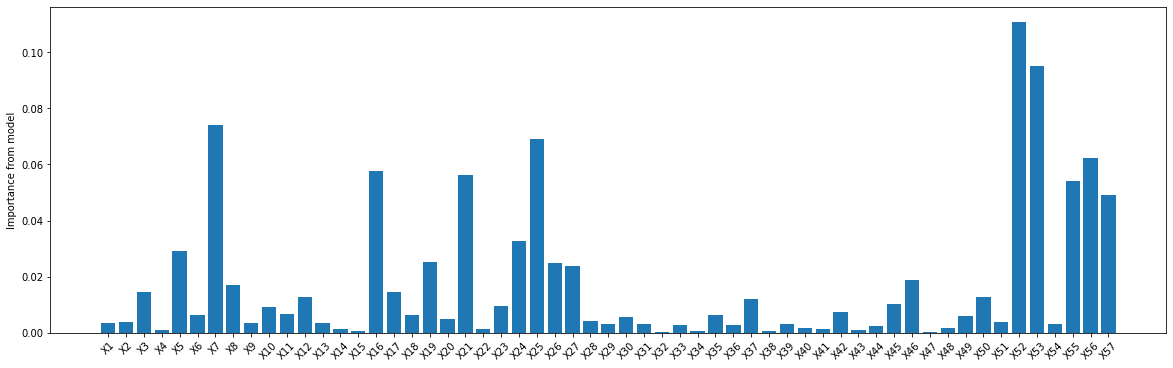

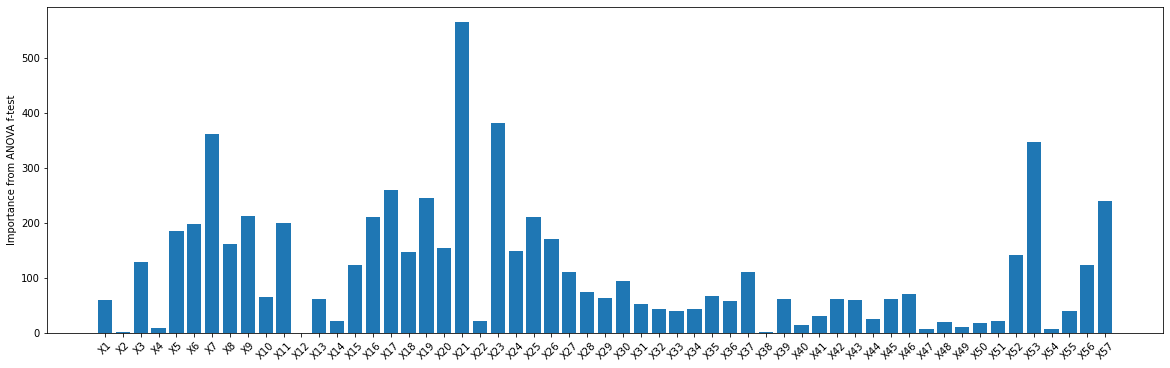

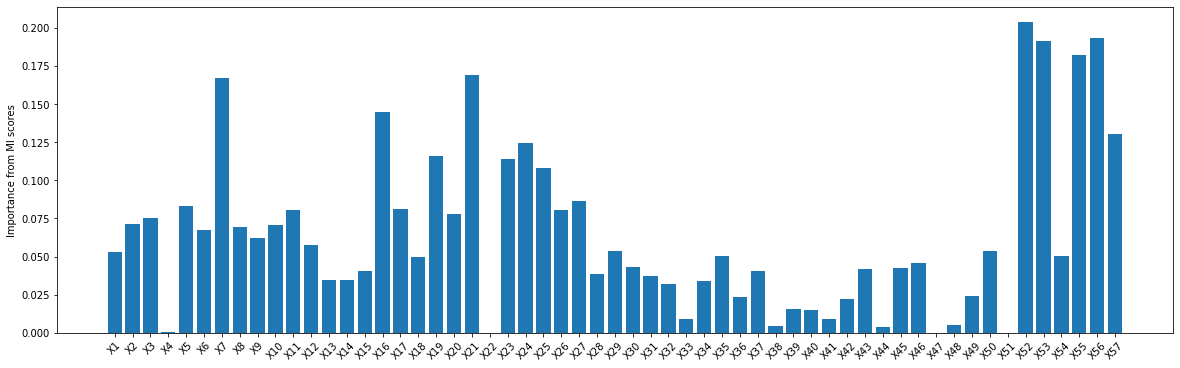

In [ ]:
x = np.arange(len(imp_fea.columns))  # the label locations

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, imp)
plt.xticks(x, imp_fea.columns, rotation=45)
plt.ylabel('Importance from model')
plt.show()

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, fs_anova_scores)
plt.xticks(x, imp_fea.columns, rotation=45)
plt.ylabel('Importance from ANOVA f-test')
plt.show()

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, fs_mi_scores)
plt.ylabel('Importance from MI scores')
plt.xticks(x, imp_fea.columns, rotation=45)
plt.show()

# Random Forest Model

### Hyper Parameter tuning

In [ ]:
X = data.drop('Y',axis=1)

pipe = Pipeline(( 
                ('pt',   PowerTransformer(standardize=True)),
                ('norm', StandardScaler()),
                ('rfc', RandomForestClassifier(class_weight='balanced_subsample')),
                ))

params = {'rfc__n_estimators': [20,25,30,35,40,45,50,55,60],
             
              'rfc__max_depth': [10,15,20,25,30,35,40,45,50]
             }

gs = GridSearchCV(cv = 5,estimator=pipe,param_grid=params)
gs.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                       ('norm', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(class_weight='balanced_subsample')))),
             param_grid={'rfc__max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'rfc__n_estimators': [20, 25, 30, 35, 40, 45, 50, 55,
                                               60]})

In [ ]:
gs_results = pd.DataFrame(gs.cv_results_)
gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__max_depth,param_rfc__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.481945,0.010887,0.014104,0.000430,10,20,"{'rfc__max_depth': 10, 'rfc__n_estimators': 20}",0.939898,0.934783,0.945013,0.936061,0.945013,0.940153,0.004310,79
1,0.514160,0.010995,0.015084,0.000540,10,25,"{'rfc__max_depth': 10, 'rfc__n_estimators': 25}",0.941176,0.951407,0.942455,0.939898,0.945013,0.943990,0.004076,73
2,0.542373,0.012022,0.016537,0.000466,10,30,"{'rfc__max_depth': 10, 'rfc__n_estimators': 30}",0.934783,0.942455,0.938619,0.932225,0.941176,0.937852,0.003845,81
3,0.575034,0.017651,0.017166,0.000657,10,35,"{'rfc__max_depth': 10, 'rfc__n_estimators': 35}",0.941176,0.937340,0.947570,0.934783,0.943734,0.940921,0.004532,78
4,0.590953,0.001692,0.018175,0.000944,10,40,"{'rfc__max_depth': 10, 'rfc__n_estimators': 40}",0.941176,0.946292,0.943734,0.937340,0.945013,0.942711,0.003174,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.630316,0.010792,0.020098,0.001226,50,40,"{'rfc__max_depth': 50, 'rfc__n_estimators': 40}",0.953964,0.951407,0.952685,0.943734,0.950128,0.950384,0.003562,23
77,0.658946,0.008192,0.020725,0.001462,50,45,"{'rfc__max_depth': 50, 'rfc__n_estimators': 45}",0.956522,0.950128,0.951407,0.945013,0.950128,0.950639,0.003671,20
78,0.689498,0.008890,0.021369,0.000157,50,50,"{'rfc__max_depth': 50, 'rfc__n_estimators': 50}",0.952685,0.948849,0.951407,0.955243,0.947570,0.951151,0.002731,12
79,0.728878,0.013586,0.022819,0.000460,50,55,"{'rfc__max_depth': 50, 'rfc__n_estimators': 55}",0.952685,0.952685,0.947570,0.945013,0.952685,0.950128,0.003235,27


In [ ]:
split_result = gs_results[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','mean_test_score']]
split_result

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,"{'rfc__max_depth': 10, 'rfc__n_estimators': 20}",0.939898,0.934783,0.945013,0.936061,0.945013,0.940153
1,"{'rfc__max_depth': 10, 'rfc__n_estimators': 25}",0.941176,0.951407,0.942455,0.939898,0.945013,0.943990
2,"{'rfc__max_depth': 10, 'rfc__n_estimators': 30}",0.934783,0.942455,0.938619,0.932225,0.941176,0.937852
3,"{'rfc__max_depth': 10, 'rfc__n_estimators': 35}",0.941176,0.937340,0.947570,0.934783,0.943734,0.940921
4,"{'rfc__max_depth': 10, 'rfc__n_estimators': 40}",0.941176,0.946292,0.943734,0.937340,0.945013,0.942711
...,...,...,...,...,...,...,...
76,"{'rfc__max_depth': 50, 'rfc__n_estimators': 40}",0.953964,0.951407,0.952685,0.943734,0.950128,0.950384
77,"{'rfc__max_depth': 50, 'rfc__n_estimators': 45}",0.956522,0.950128,0.951407,0.945013,0.950128,0.950639
78,"{'rfc__max_depth': 50, 'rfc__n_estimators': 50}",0.952685,0.948849,0.951407,0.955243,0.947570,0.951151
79,"{'rfc__max_depth': 50, 'rfc__n_estimators': 55}",0.952685,0.952685,0.947570,0.945013,0.952685,0.950128


In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.9526854219948848
{'rfc__max_depth': 35, 'rfc__n_estimators': 60}


In [ ]:
best_pipe = gs.best_estimator_
best_pipe

Pipeline(steps=[('pt', PowerTransformer()), ('norm', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=35, n_estimators=60))])

# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
best_pipe.fit(X_train, y_train)
best_pipe.score(X_test, y_test)

0.9667519181585678

In [ ]:
y_pred = best_pipe.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       472
         1.0       0.95      0.97      0.96       310

    accuracy                           0.97       782
   macro avg       0.96      0.97      0.97       782
weighted avg       0.97      0.97      0.97       782



In [ ]:
print(confusion_matrix(y_pred, y_test))

[[456  16]
 [ 10 300]]


# Comparison of scores from different models and different stages of datasets

In [ ]:
# Converting arrays to DataFrame
#anova_train_X = pd.DataFrame(X_train_fs_anova, columns=imp_fea.columns)
#anova_test_X = pd.DataFrame(X_test_fs_anova, columns=imp_fea.columns)
#mi_train_X = pd.DataFrame(X_train_fs_mi, columns=imp_fea.columns)
#mi_test_X = pd.DataFrame(X_test_fs_mi, columns=imp_fea.columns)
#anova_train_X

> Values in these X, y Tables from ANOVA and MI are unscaled
* Not needed right now

## Scaling values of X, y values from ANOVA, MI

In [ ]:
#scaler = StandardScaler()
#anova_train_X = pd.DataFrame(scaler.fit_transform(anova_train_X))
#anova_train_X.columns = imp_fea.columns
#anova_test_X = pd.DataFrame(scaler.fit_transform(anova_test_X))
#anova_test_X.columns = imp_fea.columns
#mi_train_X = pd.DataFrame(scaler.fit_transform(mi_train_X))
#mi_train_X.columns = imp_fea.columns
#mi_test_X = pd.DataFrame(scaler.fit_transform(mi_test_X))
#mi_test_X.columns = imp_fea.columns

> Here attested column names with Scaled data because it will be needed in selection of Features
* Not needed right now

In [ ]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.347605,-0.164652,8.042197,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,1.245193,-0.302852,-0.096793,-0.122548,-0.246250,-0.468745
1,-0.347605,0.282037,0.546475,-0.045337,1.232552,1.775006,5.488745,-0.266004,-0.335858,0.473260,...,-0.110359,-0.159527,-0.203612,-0.189925,0.267935,-0.302852,0.086510,0.358578,0.467970,0.158994
2,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.128919,-0.251141,-0.480850
3,1.812483,-0.164652,0.705115,-0.045337,2.467099,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,0.220179,1.137073,-0.096793,-0.083049,-0.148411,-0.278521
4,1.609975,-0.164652,-0.564002,25.853264,0.409520,-0.367125,1.200824,1.188930,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.039569,0.627262,-0.096793,-0.054444,0.345672,-0.131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.106175,-0.236466,-0.468745
3906,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.097065,-0.241358,-0.482579
3907,0.057412,-0.164652,-0.326043,-0.045337,-0.474477,0.589184,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.167415,-0.189925,-0.291164,-0.302852,-0.096793,-0.121051,-0.231574,-0.262957
3908,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,7.560539,-0.335858,-0.366346,...,-0.110359,-0.159527,0.212643,-0.189925,-0.087326,0.467702,-0.096793,-0.037911,-0.133736,-0.349422


In [ ]:
scaled_data = pd.DataFrame(data_scaled)
scaled_data.columns = imp_fea.columns
scaled_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,-0.347605,-0.164652,8.042197,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,1.245193,-0.302852,-0.096793,-0.122548,-0.246250,-0.468745
1,-0.347605,0.282037,0.546475,-0.045337,1.232552,1.775006,5.488745,-0.266004,-0.335858,0.473260,...,-0.110359,-0.159527,-0.203612,-0.189925,0.267935,-0.302852,0.086510,0.358578,0.467970,0.158994
2,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.128919,-0.251141,-0.480850
3,1.812483,-0.164652,0.705115,-0.045337,2.467099,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,0.220179,1.137073,-0.096793,-0.083049,-0.148411,-0.278521
4,1.609975,-0.164652,-0.564002,25.853264,0.409520,-0.367125,1.200824,1.188930,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.039569,0.627262,-0.096793,-0.054444,0.345672,-0.131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.106175,-0.236466,-0.468745
3906,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.097065,-0.241358,-0.482579
3907,0.057412,-0.164652,-0.326043,-0.045337,-0.474477,0.589184,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.167415,-0.189925,-0.291164,-0.302852,-0.096793,-0.121051,-0.231574,-0.262957
3908,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,7.560539,-0.335858,-0.366346,...,-0.110359,-0.159527,0.212643,-0.189925,-0.087326,0.467702,-0.096793,-0.037911,-0.133736,-0.349422


## Splitting Datasets for Selected Feature model predictions

In [ ]:
sel_train_X, sel_test_X, sel_train_y, sel_test_y = train_test_split(scaled_data, y, test_size=0.20)

In [ ]:
anova_fs_scores = pd.DataFrame(fs_anova_scores, index=imp_fea.columns, columns=['anova_scores'])
mi_fs_scores = pd.DataFrame(fs_mi_scores, index=imp_fea.columns, columns=['mi_scores'])
mi_fs_scores.T

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
mi_scores,0.053243,0.071075,0.075135,0.000262,0.082978,0.067496,0.167158,0.069102,0.06194,0.070616,...,0.00488,0.024295,0.053797,0.0,0.203599,0.191158,0.050503,0.181851,0.193421,0.130229


> Attested column name here to get the selected columns in return later from get_n_columns function

In [ ]:
def get_n_columns(score_table, col,n):
    sel_columns = score_table[col].nlargest(n).index
    return sel_columns

In [ ]:
anova_columns = get_n_columns(anova_fs_scores, 'anova_scores', 10)
anova_columns

Index(['X21', 'X23', 'X7', 'X53', 'X17', 'X19', 'X57', 'X9', 'X16', 'X25'], dtype='object')

In [ ]:
mi_columns = get_n_columns(mi_fs_scores, 'mi_scores', 10)
mi_columns

Index(['X52', 'X56', 'X53', 'X55', 'X21', 'X7', 'X16', 'X57', 'X24', 'X19'], dtype='object')

In [ ]:
mi_train_X = scaled_data[mi_columns]
mi_train_X

,X52,X56,X53,X55,X21,X7,X16,X57,X24,X19
0,1.245193,-0.246250,-0.302852,-0.122548,-0.676285,-0.288394,-0.308547,-0.468745,-0.214691,-0.943721
1,0.267935,0.467970,-0.302852,0.358578,0.249393,5.488745,-0.308547,0.158994,-0.214691,0.976745
2,-0.317954,-0.251141,-0.302852,-0.128919,-0.676285,-0.288394,-0.308547,-0.480850,-0.214691,3.658580
3,0.220179,-0.148411,1.137073,-0.083049,1.456081,-0.288394,1.305517,-0.278521,-0.214691,0.152877
4,-0.039569,0.345672,0.627262,-0.054444,0.761822,1.200824,0.417156,-0.131530,2.401307,-0.614173
...,...,...,...,...,...,...,...,...,...,...
3905,-0.317954,-0.236466,-0.302852,-0.106175,-0.676285,-0.288394,-0.308547,-0.468745,-0.214691,3.209713
3906,-0.317954,-0.241358,-0.302852,-0.097065,-0.676285,-0.288394,-0.308547,-0.482579,-0.214691,-0.943721
3907,-0.291164,-0.231574,-0.302852,-0.121051,-0.254771,-0.288394,-0.158402,-0.262957,-0.214691,0.300605
3908,-0.087326,-0.133736,0.467702,-0.037911,-0.676285,-0.288394,-0.308547,-0.349422,-0.214691,-0.943721


# Random Forest model on unchanged data, features selected from MI and ANOVA methods

In [ ]:
unchanged_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
unchanged_data
raw_X, raw_y = create_XY(unchanged_data)

In [ ]:
raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(raw_X, raw_y, test_size=0.20)
raw_rfc = RandomForestClassifier(class_weight='balanced_subsample')
raw_rfc.fit(raw_X_train, raw_y_train)
raw_rfc_predictions = raw_rfc.predict(raw_X_test)
raw_acc = accuracy_score(raw_rfc_predictions, raw_y_test)

print("Accuracy Score for Raw Unscaled Data: {:,.04f}".format(raw_acc))
confusion_matrix(raw_rfc_predictions, raw_y_test)

Accuracy Score for Raw Unscaled Data: 0.9501


array([[462,  23],
       [ 16, 281]])

In [ ]:
anova_rfc = RandomForestClassifier(class_weight='balanced_subsample')
anova_rfc.fit(sel_train_X[anova_columns], sel_train_y)
anova_rfc_predictions = anova_rfc.predict(sel_test_X[anova_columns])
anova_acc = accuracy_score(anova_rfc_predictions, sel_test_y)

print("Accuracy Score for ANOMA feature selection method: {:,.04f}".format(anova_acc))
confusion_matrix(anova_rfc_predictions, sel_test_y)

Accuracy Score for ANOMA feature selection method: 0.9233


array([[452,  33],
       [ 27, 270]])

In [ ]:
#anova_rfc = RandomForestClassifier(class_weight='balanced_subsample')
#anova_rfc.fit(anova_train_X[anova_columns], y_train)
#anova_rfc_predictions = anova_rfc.predict(anova_test_X[anova_columns])
#anova_acc = accuracy_score(anova_rfc_predictions, y_test)

#print("Accuracy Score for ANOMA feature selection method: {:,.04f}".format(anova_acc))
#confusion_matrix(anova_rfc_predictions, y_test)

In [ ]:
mi_rfc = RandomForestClassifier(class_weight='balanced_subsample')
mi_rfc.fit(sel_train_X[mi_columns], sel_train_y)
mi_rfc_predictions = mi_rfc.predict(sel_test_X[mi_columns])
mi_acc = accuracy_score(mi_rfc_predictions, sel_test_y)

print("Accuracy Score for MI feature selection method: {:,.04f}".format(mi_acc))
confusion_matrix(mi_rfc_predictions, sel_test_y)

Accuracy Score for MI feature selection method: 0.9297


array([[454,  30],
       [ 25, 273]])

### Inference
* With 10 features both models predicting with accuracy > 91%
* Prediction is heavily dependent on these features

#### Common Columns

In [ ]:
print(anova_columns)
print(mi_columns)
common_columns = set(anova_columns).intersection(mi_columns)
common_columns

Index(['X21', 'X23', 'X7', 'X53', 'X17', 'X19', 'X57', 'X9', 'X16', 'X25'], dtype='object')
Index(['X52', 'X56', 'X53', 'X55', 'X21', 'X7', 'X16', 'X57', 'X24', 'X19'], dtype='object')


{'X16', 'X19', 'X21', 'X53', 'X57', 'X7'}

## Accuracy with these 6 common columns

In [ ]:
new_rfc = RandomForestClassifier(class_weight='balanced_subsample')
new_rfc.fit(sel_train_X[common_columns], sel_train_y)
new_rfc_predictions = new_rfc.predict(sel_test_X[common_columns])
new_acc = accuracy_score(new_rfc_predictions, sel_test_y)

print("Accuracy Score for ANOMA feature selection method: {:,.04f}".format(new_acc))
confusion_matrix(new_rfc_predictions, sel_test_y)

Accuracy Score for ANOMA feature selection method: 0.8939


array([[435,  39],
       [ 44, 264]])

# Accuracies for different number of Features Selected

### ANOMA F-test

In [ ]:
i=5
while(i<=55):
    anova_columns = get_n_columns(anova_fs_scores, 'anova_scores', i)
    anova_rfc = RandomForestClassifier(class_weight='balanced_subsample')
    anova_rfc.fit(sel_train_X[anova_columns], sel_train_y)
    anova_rfc_predictions = anova_rfc.predict(sel_test_X[anova_columns])
    anova_acc = accuracy_score(anova_rfc_predictions, sel_test_y)

    print("Accuracy Score for {} features with ANOMA method: {:,.04f}".format(i, anova_acc))
    i=i+5

Accuracy Score for 5 features with ANOMA method: 0.8670
Accuracy Score for 10 features with ANOMA method: 0.9220
Accuracy Score for 15 features with ANOMA method: 0.9425
Accuracy Score for 20 features with ANOMA method: 0.9463
Accuracy Score for 25 features with ANOMA method: 0.9552
Accuracy Score for 30 features with ANOMA method: 0.9552
Accuracy Score for 35 features with ANOMA method: 0.9565
Accuracy Score for 40 features with ANOMA method: 0.9565
Accuracy Score for 45 features with ANOMA method: 0.9552
Accuracy Score for 50 features with ANOMA method: 0.9552
Accuracy Score for 55 features with ANOMA method: 0.9527


### MI Feature Selection Method

In [ ]:
i=5
while(i<56):
    mi_columns = get_n_columns(mi_fs_scores, 'mi_scores', i)
    mi_rfc = RandomForestClassifier(class_weight='balanced_subsample')
    mi_rfc.fit(sel_train_X[mi_columns], sel_train_y)
    mi_rfc_predictions = mi_rfc.predict(sel_test_X[mi_columns])
    mi_acc = accuracy_score(mi_rfc_predictions, sel_test_y)

    print("Accuracy Score with {} features for MI feature selection method: {:,.04f}".format(i,mi_acc))
    i = i+5

Accuracy Score with 5 features for MI feature selection method: 0.8964
Accuracy Score with 10 features for MI feature selection method: 0.9271
Accuracy Score with 15 features for MI feature selection method: 0.9501
Accuracy Score with 20 features for MI feature selection method: 0.9488
Accuracy Score with 25 features for MI feature selection method: 0.9450
Accuracy Score with 30 features for MI feature selection method: 0.9527
Accuracy Score with 35 features for MI feature selection method: 0.9514
Accuracy Score with 40 features for MI feature selection method: 0.9514
Accuracy Score with 45 features for MI feature selection method: 0.9552
Accuracy Score with 50 features for MI feature selection method: 0.9540
Accuracy Score with 55 features for MI feature selection method: 0.9552


### Inference
* With just 10 features out of 57 we can predict with 92% accuracy. Sometime it varies because random seed has not been made constant.
* So we can conclude few features have a lot of impact on the output.

In [ ]:
# Accuracy Score with best estimator
top_score = gs.best_score_
gs.best_params_

{'rfc__max_depth': 35, 'rfc__n_estimators': 60}

# Multiple Predictions

## Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier(random_state=1 )
dt_cls.fit(X_train, y_train)
dt_cls_predictions = dt_cls.predict(X_test)
dt_cls_acc = accuracy_score(dt_cls_predictions, y_test)

print("Accuracy for Decision Tree Model: {:,.04f}".format(dt_cls_acc))
confusion_matrix(dt_cls_predictions, y_test)

Accuracy for Decision Tree Model: 0.9105


array([[443,  47],
       [ 23, 269]])

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_cls = BaggingClassifier(random_state=1 )
bag_cls.fit(X_train, y_train)
bag_cls_predictions = bag_cls.predict(X_test)
bag_cls_acc = accuracy_score(bag_cls_predictions, y_test)

print("Accuracy for Bagging Classifier Model: {:,.04f}".format(bag_cls_acc))
confusion_matrix(dt_cls_predictions, y_test)

Accuracy for Bagging Classifier Model: 0.9361


array([[443,  47],
       [ 23, 269]])

# Submission

In [ ]:
test_data = pd.read_csv('/content/test_set.csv').drop(['Unnamed: 0'],axis =1)

In [ ]:
test_data.isnull().sum().any()

False

In [ ]:
y_test_prediction = best_pipe.predict(test_data)
y_test_prediction

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.

In [ ]:
test_data['prediction'] = y_test_prediction
test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,prediction
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0.0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1.0
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1.0
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1.0
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1.0


In [ ]:
test_prediction = test_data[['prediction']]
test_prediction = test_prediction.astype(int)
test_prediction

,prediction
0,0
1,1
2,1
3,1
4,1
...,...
686,0
687,0
688,0
689,0


In [ ]:
# only prediction Column
test_prediction.to_csv('test_prediction_only_y_values.csv')

In [ ]:
# Prediction with whole test data set
test_data.to_csv('test_prediction_with_whole_test_dataset.csv')